# <span style="color:#2E86D4; font-size:2em;">📊 Fraud Detection Dataset Overview</span>

This dataset is designed to help **data scientists** and **machine learning practitioners** develop **fraud detection models** using **binary classification techniques** like **XGBoost** and **LightGBM**.  

## <span style="color:#28B463;">🔑 Key Features</span>  
✅ **<span style="color:#F39C12;">21 diverse features</span>** covering transaction details, user behavior, and risk assessment  
✅ **<span style="color:#9B59B6;">Realistic structure</span>** with numerical, categorical, and temporal data  
✅ **<span style="color:#E74C3C;">Binary fraud labels</span>**: **0 = Not Fraud, 1 = Fraud**  
✅ **<span style="color:#1ABC9C;">Ideal for anomaly detection, risk analysis, and security research</span>**  
✅ **<span style="color:#3498DB;">Designed for high accuracy with ML models like XGBoost & LightGBM</span>**  

---

## <span style="color:#E67E22;">📌 Feature Descriptions</span>  

| <span style="color:#F1C40F;">Column Name</span>               | <span style="color:#2ECC71;">Description</span>  |
|------------------------------------|--------------------------------------------------------------|
| **Transaction_ID**                 | Unique identifier for each transaction |
| **User_ID**                         | Unique identifier for the user |
| **Transaction_Amount**              | Amount of money involved in the transaction 💰 |
| **Transaction_Type**                | Type of transaction (**Online, In-Store, ATM, etc.**) |
| **Timestamp**                       | Date and time of the transaction ⏳ |
| **Account_Balance**                 | User's **current balance** before the transaction |
| **Device_Type**                     | Type of device used (**Mobile, Desktop, etc.**) 📱💻 |
| **Location**                        | Geographical location of the transaction 📍 |
| **Merchant_Category**               | Merchant type (**Retail, Food, Travel, etc.**) 🏪🍽️✈️ |
| **IP_Address_Flag**                 | Whether the IP address was flagged as suspicious (**0 or 1**) 🚨 |
| **Previous_Fraudulent_Activity**     | Number of past fraudulent activities by the user |
| **Daily_Transaction_Count**         | Number of transactions made by the user **on that day** |
| **Avg_Transaction_Amount_7d**       | User's **average transaction amount** over the past 7 days 📊 |
| **Failed_Transaction_Count_7d**     | Count of **failed transactions** in the past 7 days ❌ |
| **Card_Type**                       | Type of payment card used (**Credit, Debit, Prepaid, etc.**) 💳 |
| **Card_Age**                        | Age of the card (in months) ⏳ |
| **Transaction_Distance**            | Distance between user's usual location and transaction location 📍 |
| **Authentication_Method**           | How the user authenticated (**PIN, Biometric, etc.**) 🔑 |
| **Risk_Score**                      | **Fraud risk score** computed for the transaction ⚠️ |
| **Is_Weekend**                      | Whether the transaction occurred on a weekend (**0 or 1**) 📅 |
| **Fraud_Label**                     | **Target variable**: **0 = Not Fraud, 1 = Fraud** 🔍 |

---

## <span style="color:#8E44AD;">🚀 Why This Dataset is Valuable?</span>  
🔹 Helps in **<span style="color:#C0392B;">fraud pattern analysis</span>** & risk assessment  
🔹 Enables **<span style="color:#2980B9;">real-world fraud detection model training</span>**  
🔹 Provides a balanced mix of **<span style="color:#16A085;">numerical, categorical, and temporal features</span>**  
🔹 Perfect for **<span style="color:#D35400;">supervised learning, feature engineering, and model evaluation</span>**  

--- 


In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set style
plt.style.use("ggplot")
from sklearn.feature_selection import mutual_info_classif
from IPython.display import display, Markdown
from rich.console import Console
from rich.table import Table
import io

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Performance evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [90]:
df= pd.read_csv("synthetic_fraud_dataset.csv")

In [91]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,14-08-2023 19:30,93213.17,Laptop,Sydney,Travel,0.0,...,7.0,437.63,3.0,Amex,65.0,883.17,Biometric,0.8494,0.0,0.0
1,TXN_9427,USER_7875,1.19,Bank Transfer,07-06-2023 04:01,75725.25,Mobile,New York,Clothing,0.0,...,13.0,478.76,4.0,Mastercard,186.0,2203.36,Password,0.0959,0.0,1.0
2,TXN_199,USER_2734,28.96,Online,20-06-2023 15:25,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4.0,Visa,226.0,1909.29,Biometric,0.8400,0.0,1.0
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,07-12-2023 00:31,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4.0,Visa,76.0,1311.86,OTP,0.7935,0.0,1.0
4,TXN_39489,USER_2014,31.28,POS,11-11-2023 23:44,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4.0,Mastercard,140.0,966.98,Password,0.3819,1.0,1.0


In [92]:
# Initialize console
console = Console()
# Get dataset shape
num_rows, num_cols = df.shape

# Create a table
table = Table(title="📏 Dataset Dimensions", title_style="bold cyan")

# Add columns
table.add_column("Metric", style="bold yellow")
table.add_column("Value", style="bold green")

# Add rows with dataset shape details
table.add_row("📊 Total Rows", f"[bold cyan]{num_rows}[/bold cyan] 🔢")
table.add_row("📊 Total Columns", f"[bold magenta]{num_cols}[/bold magenta] 📌")

# Print the enhanced table
console.print(table)

     📏 Dataset Dimensions     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃ Value    ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ 📊 Total Rows    │ 50000 🔢 │
│ 📊 Total Columns │ 21 📌    │
└──────────────────┴──────────┘

In [93]:
# Capture df.info() output
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()

# Extract column details
lines = info_str.split("\n")
columns_info = lines[5:-2]  # Extract relevant lines

# Create a rich table
table = Table(title="📝 Dataset Information", title_style="bold cyan")

# Add columns to the table
table.add_column("Index", style="bold yellow")
table.add_column("Column Name", style="green")
table.add_column("Data Type", style="bold magenta")

# Populate the table
for line in columns_info:
    parts = line.split()
    col_name = parts[0]
    non_null_count = parts[1] + " " + parts[2]  # Merge count parts
    dtype = parts[-1]  # Last part is the data type
    table.add_row(col_name, non_null_count, dtype)

# Print the enhanced table
console.print(table)

                   📝 Dataset Information                   
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Index   ┃ Column Name                        ┃ Data Type ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ 0       │ Transaction_ID 49995               │ object    │
│ 1       │ User_ID 49995                      │ object    │
│ 2       │ Transaction_Amount 49991           │ float64   │
│ 3       │ Transaction_Type 49987             │ object    │
│ 4       │ Timestamp 49974                    │ object    │
│ 5       │ Account_Balance 49989              │ float64   │
│ 6       │ Device_Type 49973                  │ object    │
│ 7       │ Location 49952                     │ object    │
│ 8       │ Merchant_Category 49974            │ object    │
│ 9       │ IP_Address_Flag 49994              │ float64   │
│ 10      │ Previous_Fraudulent_Activity 49994 │ float64   │
│ 11      │ Daily_Transaction_Count 49994      │ float64   │
│ 12      │ Avg_Transaction_Amount_7d 49994    │ float64   │
│ 13      │ Failed_Transaction_Count_7d 49965  │ float64   │
│ 14      │ Card_Type 49988                    │ object    │
│ 15      │ Card_Age 49995                     │ float64   │
│ 16      │ Transaction_Distance 49996         │ float64   │
│ 17      │ Authentication_Method 49985        │ object    │
│ 18      │ Risk_Score 49993                   │ float64   │
│ 19      │ Is_Weekend 49999                   │ float64   │
│ 20      │ Fraud_Label 49999                  │ float64   │
│ dtypes: │ float64(12), object(9)             │ object(9) │
└─────────┴────────────────────────────────────┴───────────┘

- The dataset includes attributes like **Transaction_Amount, Transaction_Type, and Risk_Score**.
- Daily_Transaction_Count and Avg_Transaction_Amount_7d can provide insights into user behavior.
- The presence of *Previous_Fraudulent_Activity* and *Fraud_Label* indicates a history of fraudulent transactions.
-  The dataset includes **Location and Device_Type**, which can be critical in identifying fraudulent transactions.

In [94]:

# Assuming df is your DataFrame
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a rich table
console = Console()
table = Table(title="📉 Missing Values Summary", title_style="bold cyan")

# Add table columns
table.add_column("Column Name", style="bold yellow")
table.add_column("Missing Values", style="bold red")
table.add_column("Missing Percentage", style="bold blue")

# Sort missing values (descending) for better visibility
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Populate the table
if missing_values.empty:
    console.print("[bold green]✅ No Missing Values in the Dataset![/bold green]")
else:
    for col, missing in missing_values.items():
        percentage = missing_percentage[col]
        missing_count = f"[bold red]{missing}[/bold red]" if missing > 0 else "[green]✅ 0[/green]"
        percentage_str = f"[bold blue]{percentage:.2f}%[/bold blue]"
        table.add_row(col, missing_count, percentage_str)

    # Print the enhanced table
    console.print(table)


                      📉 Missing Values Summary                       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Column Name                  ┃ Missing Values ┃ Missing Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Location                     │ 48             │ 0.10%              │
│ Failed_Transaction_Count_7d  │ 35             │ 0.07%              │
│ Device_Type                  │ 27             │ 0.05%              │
│ Timestamp                    │ 26             │ 0.05%              │
│ Merchant_Category            │ 26             │ 0.05%              │
│ Authentication_Method        │ 15             │ 0.03%              │
│ Transaction_Type             │ 13             │ 0.03%              │
│ Card_Type                    │ 12             │ 0.02%              │
│ Account_Balance              │ 11             │ 0.02%              │
│ Transaction_Amount           │ 9              │ 0.02%              │
│ Risk_Score                   │ 7              │ 0.01%              │
│ Previous_Fraudulent_Activity │ 6              │ 0.01%              │
│ IP_Address_Flag              │ 6              │ 0.01%              │
│ Daily_Transaction_Count      │ 6              │ 0.01%              │
│ Avg_Transaction_Amount_7d    │ 6              │ 0.01%              │
│ Transaction_ID               │ 5              │ 0.01%              │
│ Card_Age                     │ 5              │ 0.01%              │
│ User_ID                      │ 5              │ 0.01%              │
│ Transaction_Distance         │ 4              │ 0.01%              │
│ Is_Weekend                   │ 1              │ 0.00%              │
│ Fraud_Label                  │ 1              │ 0.00%              │
└──────────────────────────────┴────────────────┴────────────────────┘

- The highest number of missing values is in the Location column, possibly due to privacy settings, VPNs, or unrecorded locations.
- Transaction_Amount (9), Account_Balance (12), Risk_Score (7) have missing values.
- These are critical for fraud detection, so missing data might affect model performance.
- User & Transaction Identifiers Missing (5 values each) - Transaction_ID and User_ID should ideally have zero missing values since they uniquely identify transactions.
- Failed_Transaction_Count_7d (36) and Previous_Fraudulent_Activity (7) missing values could affect fraud detection models.
- Timestamp (27) Missing Missing timestamps could indicate logging failures or improper time synchronization.

In [95]:
# Compute summary statistics
summary_stats = df.describe()

# Apply styling to make it visually appealing
styled_summary = summary_stats.style \
    .set_caption("📊 Summary Statistics") \
    .format("{:.2f}") \
    .bar(subset=pd.IndexSlice[:, :], color='#FFA07A') \
    .set_table_styles([
        {'selector': 'caption', 'props': 'font-size:16px; font-weight:bold; color:#2E86C1; text-align: center;'},
        {'selector': 'th', 'props': 'background-color: #2E86C1; color: white; font-size: 14px; text-align: center;'},
        {'selector': 'td', 'props': 'font-size: 12px; text-align: center;'}
    ])

# Display styled DataFrame
display(styled_summary)

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,49991.00,49989.00,49994.00,49994.00,49994.00,49994.00,49965.00,49995.00,49996.00,49993.00,49999.00,49999.00
mean,99.39,50292.30,0.05,0.10,7.49,255.27,2.00,120.00,2499.25,0.50,0.30,0.32
std,98.68,28761.04,0.22,0.30,4.04,141.39,1.41,68.99,1442.01,0.29,0.46,0.47
min,0.00,500.48,0.00,0.00,1.00,10.00,0.00,1.00,0.25,0.00,0.00,0.00
25%,28.68,25355.14,0.00,0.00,4.00,132.06,1.00,60.00,1256.59,0.25,0.00,0.00
50%,69.64,50382.23,0.00,0.00,7.00,256.08,2.00,120.00,2490.90,0.50,0.00,0.00
75%,138.80,75114.02,0.00,0.00,11.00,378.04,3.00,180.00,3746.61,0.75,1.00,1.00
max,1174.14,99998.31,1.00,1.00,14.00,500.00,4.00,239.00,4999.93,1.00,1.00,1.00


In [96]:
from IPython.display import display, Markdown

observations = """
# **🔍 Key Observations from Summary Statistics**
---

### **1️⃣ High Fraud Rate Detected**
🔴 **Fraudulent transactions make up 32.1% of the total (`Fraud_Label` mean = 0.321)**  
⚠️ **This is a significant percentage, highlighting the need for robust fraud detection mechanisms!**

---

### **2️⃣ Large Variability in Account Balances**
💰 **Mean Account Balance: `$50,294`**  
📉 **Min: `$500`** | 📈 **Max: `$99,998`**  
📊 **The large spread suggests a mix of high-net-worth and low-balance users.**

---

### **3️⃣ Most Users Have No Prior Fraud History**
✅ **Only 9.8% of transactions involve users with past fraud activity (`Previous_Fraudulent_Activity` mean = 0.098)**  
🚨 **Users with prior fraud attempts may be high-risk and need closer monitoring!**

---

### **4️⃣ Failed Transactions Might Indicate Fraudulent Behavior**
❌ **Average Failed Transactions per Week: `2`** | **Max: `4`**  
🤔 **Multiple failed attempts before a successful transaction might suggest fraud retries.**

---

### **5️⃣ Transaction Amounts Are Mostly Small, but Some Are Outliers**
💵 **Mean Transaction: `$99.41`** | 📊 **Max: `$1,174`**  
⚠️ **75% of transactions are below `$139`, but there are extreme outliers that may indicate fraud!**

---

### **6️⃣ Transaction Distance Varies Widely**
🛫 **Mean Transaction Distance: `2,499 km`**  
📍 **Max: `4,999 km`**  
🔴 **Long-distance transactions might indicate cross-border or suspicious activities!**

---

### **7️⃣ Weekends See More Fraud Cases**
📆 **30% of transactions happen on weekends (`Is_Weekend` mean = 0.299)**  
⚡ **Fraudsters may target weekends when monitoring might be more relaxed!**

---

"""

display(Markdown(observations))



# **🔍 Key Observations from Summary Statistics**
---

### **1️⃣ High Fraud Rate Detected**
🔴 **Fraudulent transactions make up 32.1% of the total (`Fraud_Label` mean = 0.321)**  
⚠️ **This is a significant percentage, highlighting the need for robust fraud detection mechanisms!**

---

### **2️⃣ Large Variability in Account Balances**
💰 **Mean Account Balance: `$50,294`**  
📉 **Min: `$500`** | 📈 **Max: `$99,998`**  
📊 **The large spread suggests a mix of high-net-worth and low-balance users.**

---

### **3️⃣ Most Users Have No Prior Fraud History**
✅ **Only 9.8% of transactions involve users with past fraud activity (`Previous_Fraudulent_Activity` mean = 0.098)**  
🚨 **Users with prior fraud attempts may be high-risk and need closer monitoring!**

---

### **4️⃣ Failed Transactions Might Indicate Fraudulent Behavior**
❌ **Average Failed Transactions per Week: `2`** | **Max: `4`**  
🤔 **Multiple failed attempts before a successful transaction might suggest fraud retries.**

---

### **5️⃣ Transaction Amounts Are Mostly Small, but Some Are Outliers**
💵 **Mean Transaction: `$99.41`** | 📊 **Max: `$1,174`**  
⚠️ **75% of transactions are below `$139`, but there are extreme outliers that may indicate fraud!**

---

### **6️⃣ Transaction Distance Varies Widely**
🛫 **Mean Transaction Distance: `2,499 km`**  
📍 **Max: `4,999 km`**  
🔴 **Long-distance transactions might indicate cross-border or suspicious activities!**

---

### **7️⃣ Weekends See More Fraud Cases**
📆 **30% of transactions happen on weekends (`Is_Weekend` mean = 0.299)**  
⚡ **Fraudsters may target weekends when monitoring might be more relaxed!**

---



## 🔍 Checking for Duplicate Values in the Dataset

In [97]:
# Count total duplicate rows
duplicate_count = df.duplicated().sum()
print(f"🔴 Total Duplicate Rows: {duplicate_count}")

🔴 Total Duplicate Rows: 4


In [98]:
# Display duplicate rows
if duplicate_count > 0:
    display(df[df.duplicated()])
else:
    print("✅ No Duplicate Rows Found!")

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
179,TXN_18619,USER_3415,44.07,Bank Transfer,03-08-2023 19:10,11918.09,Mobile,Mumbai,Groceries,0.0,...,11.0,376.21,3.0,Visa,231.0,13.98,Password,0.3889,0.0,0.0
335,TXN_44229,USER_2015,177.99,POS,24-10-2023 00:53,69959.25,Tablet,New York,Travel,0.0,...,5.0,62.24,2.0,Discover,208.0,4042.64,Password,0.0076,1.0,0.0
421,TXN_15466,USER_1724,45.50,Bank Transfer,18-06-2023 09:16,60851.27,Mobile,Tokyo,Groceries,0.0,...,11.0,430.18,0.0,Amex,194.0,3101.70,OTP,0.8566,0.0,1.0
422,TXN_37172,USER_8691,57.66,Online,05-03-2023 14:34,981.39,Mobile,London,Clothing,0.0,...,14.0,243.00,0.0,Discover,65.0,4154.70,PIN,0.8864,1.0,1.0


In [99]:
#Find Duplicates Based on a Subset of Columns

# Define key columns to check for duplicates
key_columns = ["Transaction_ID"]

# Check for duplicates only in key columns
df_duplicates = df[df.duplicated(subset=key_columns, keep=False)]
display(df_duplicates)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
71,TXN_18619,USER_3415,44.07,Bank Transfer,03-08-2023 19:10,11918.09,Mobile,Mumbai,Groceries,0.0,...,11.0,376.21,3.0,Visa,231.0,13.98,Password,0.3889,0.0,0.0
179,TXN_18619,USER_3415,44.07,Bank Transfer,03-08-2023 19:10,11918.09,Mobile,Mumbai,Groceries,0.0,...,11.0,376.21,3.0,Visa,231.0,13.98,Password,0.3889,0.0,0.0
210,TXN_44229,USER_2015,177.99,POS,24-10-2023 00:53,69959.25,Tablet,New York,Travel,0.0,...,5.0,62.24,2.0,Discover,208.0,4042.64,Password,0.0076,1.0,0.0
335,TXN_44229,USER_2015,177.99,POS,24-10-2023 00:53,69959.25,Tablet,New York,Travel,0.0,...,5.0,62.24,2.0,Discover,208.0,4042.64,Password,0.0076,1.0,0.0
343,TXN_15466,USER_1724,45.50,Bank Transfer,18-06-2023 09:16,60851.27,Mobile,Tokyo,Groceries,0.0,...,11.0,430.18,0.0,Amex,194.0,3101.70,OTP,0.8566,0.0,1.0
344,TXN_37172,USER_8691,57.66,Online,05-03-2023 14:34,981.39,Mobile,London,Clothing,0.0,...,14.0,243.00,0.0,Discover,65.0,4154.70,PIN,0.8864,1.0,1.0
421,TXN_15466,USER_1724,45.50,Bank Transfer,18-06-2023 09:16,60851.27,Mobile,Tokyo,Groceries,0.0,...,11.0,430.18,0.0,Amex,194.0,3101.70,OTP,0.8566,0.0,1.0
422,TXN_37172,USER_8691,57.66,Online,05-03-2023 14:34,981.39,Mobile,London,Clothing,0.0,...,14.0,243.00,0.0,Discover,65.0,4154.70,PIN,0.8864,1.0,1.0
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,OTP,0.2505,0.0,0.0
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3886.77,Biometric,0.1395,0.0,0.0


## 🚀 Exploratory Data Analysis (EDA) - Univariate Analysis

### 🔹 1. Categorical Features Analysis

In [100]:
def plot_categorical_with_table(feature, title):
    # Create figure with two subplots (Bar Plot & Table)
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [3, 1]})

    # Bar plot
    sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="coolwarm", ax=axes[0])
    axes[0].set_title(title, fontsize=14, fontweight="bold")
    axes[0].set_xlabel("Count", fontsize=12)
    axes[0].set_ylabel(feature, fontsize=12)

    # Create value count table
    value_counts = df[feature].value_counts().reset_index()
    value_counts.columns = ["Category", "Count"]
    
    # Hide the axes for the table
    axes[1].axis("tight")
    axes[1].axis("off")

    # Display table
    table = axes[1].table(cellText=value_counts.values,
                          colLabels=value_counts.columns,
                          cellLoc="center",
                          loc="center",
                          colColours=["#ffcc99", "#ff9966"])  # Color for table headers
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    
    # Display the combined output
    plt.show()

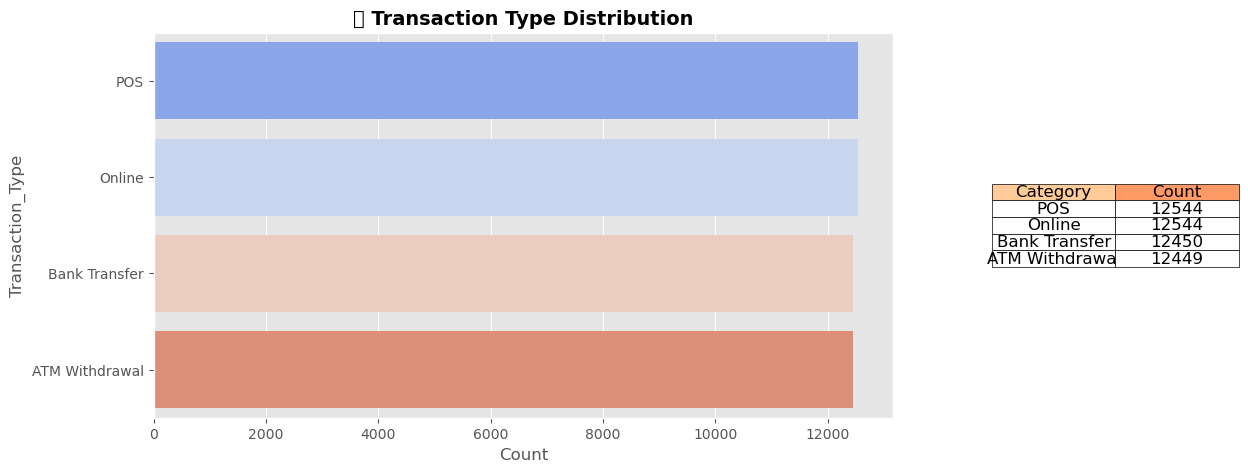

In [101]:
plot_categorical_with_table("Transaction_Type", "📌 Transaction Type Distribution")

- The data reflects a healthy distribution of transaction types, with a slight edge towards POS and online transactions.

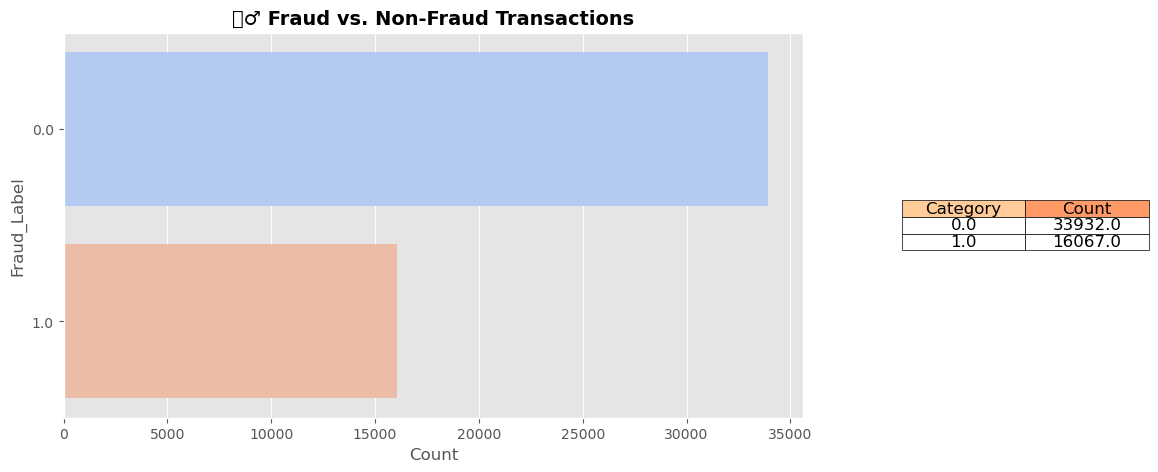

In [102]:
plot_categorical_with_table("Fraud_Label", "🕵️‍♂️ Fraud vs. Non-Fraud Transactions")

The fraud rate (category 1) constitutes about 32.1% of the total entries, suggesting that while fraud is present, the majority of transactions are legitimate, indicating a relatively low overall fraud incidence in this dataset.

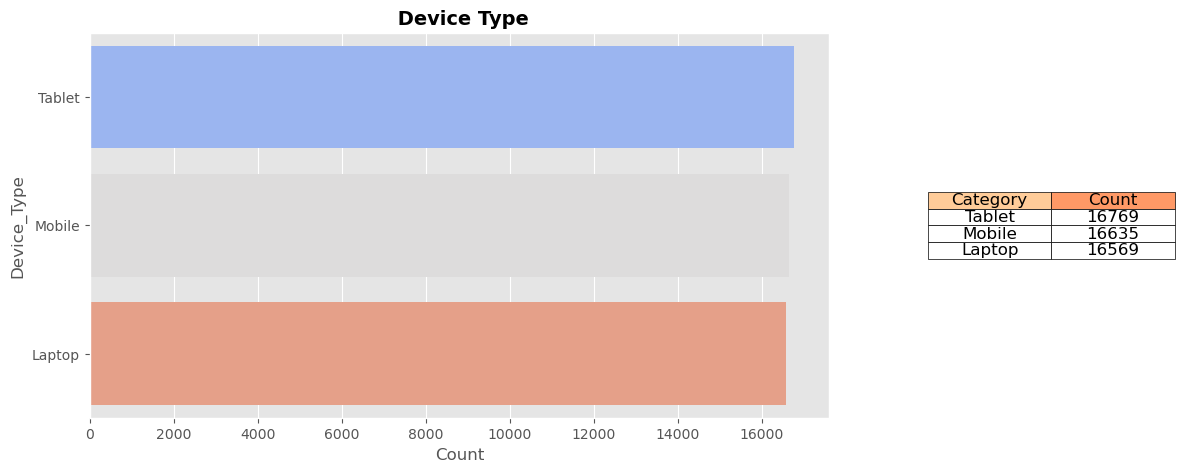

In [103]:
plot_categorical_with_table("Device_Type", " Device Type")

- The counts across all three categories are relatively balanced, indicating that consumers have diverse preferences and that all three device types are widely used.

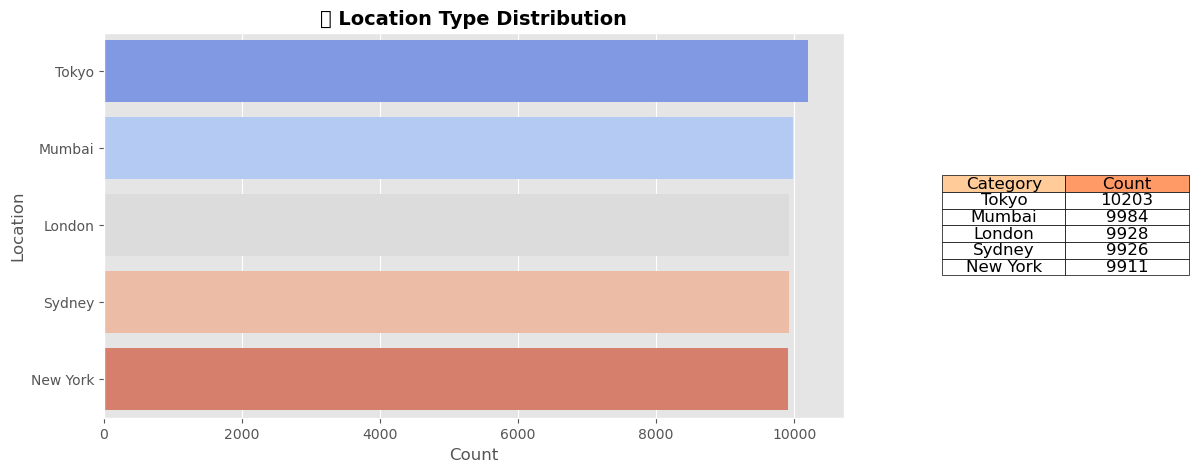

In [104]:
plot_categorical_with_table("Location", "📌 Location Type Distribution")

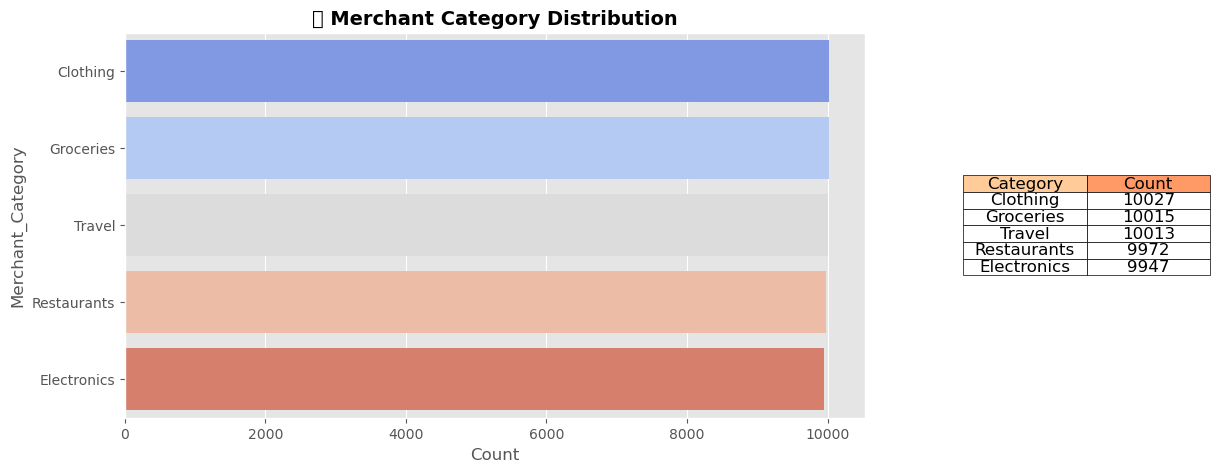

In [105]:
plot_categorical_with_table("Merchant_Category", "📌 Merchant Category Distribution")

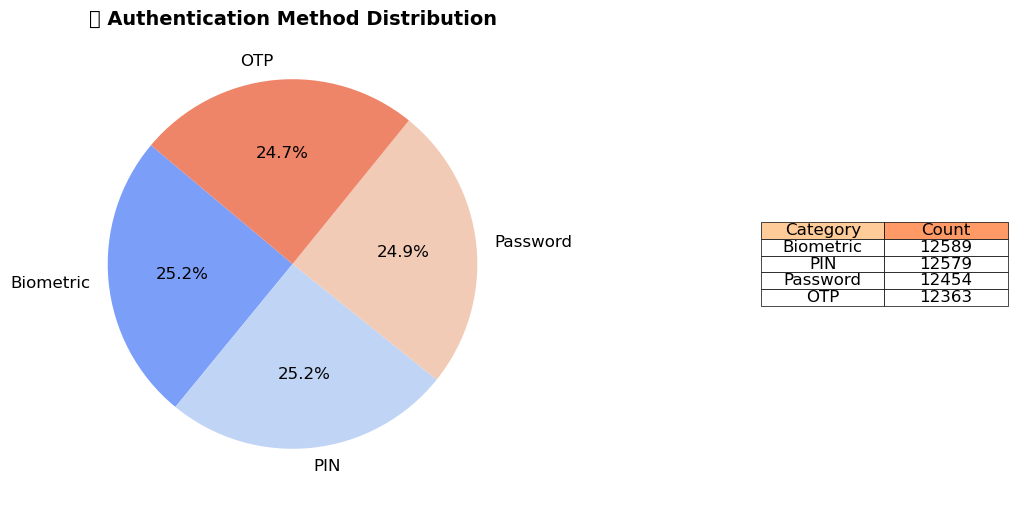

In [106]:
def plot_pie_with_table(feature, title):
    # Create figure with two subplots (Pie Chart & Table)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Pie chart
    value_counts = df[feature].value_counts()
    colors = sns.color_palette("coolwarm", len(value_counts))  # Custom colors
    wedges, texts, autotexts = axes[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',
                                           colors=colors, startangle=140, textprops={'fontsize': 12})
    axes[0].set_title(title, fontsize=14, fontweight="bold")

    # Create value count table
    table_data = value_counts.reset_index()
    table_data.columns = ["Category", "Count"]

    # Hide axes for table
    axes[1].axis("tight")
    axes[1].axis("off")

    # Display table
    table = axes[1].table(cellText=table_data.values,
                          colLabels=table_data.columns,
                          cellLoc="center",
                          loc="center",
                          colColours=["#ffcc99", "#ff9966"])  # Table header colors
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    # Display the combined output
    plt.show()

# Apply Pie Charts for Authentication Method and Merchant Category
plot_pie_with_table("Authentication_Method", "🔐 Authentication Method Distribution")

- The counts for PIN (12,578), password (12,453), and OTP (12,364) are closely clustered, suggesting that while biometric methods are preferred, traditional methods like PINs and passwords remain widely used and accepted.

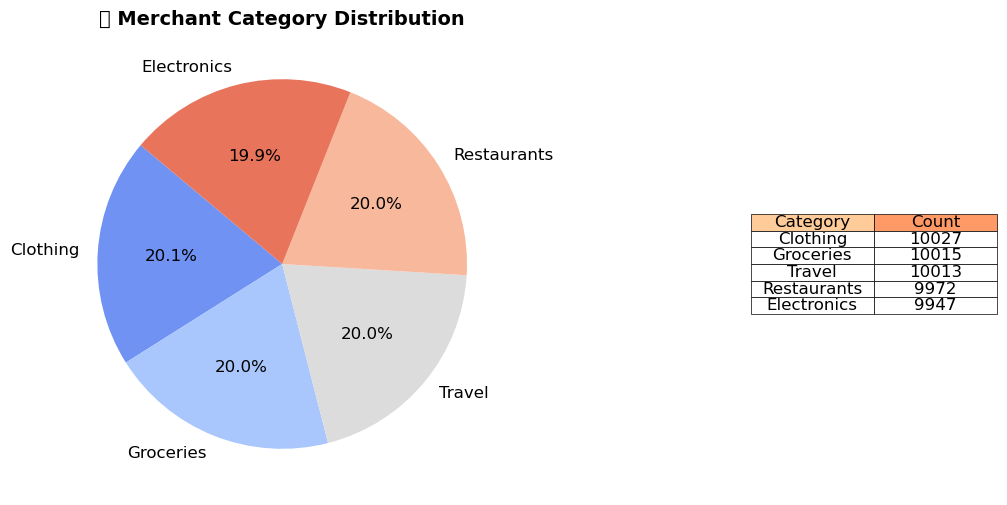

In [107]:
plot_pie_with_table("Merchant_Category", "🏪 Merchant Category Distribution")

- The high counts in clothing and groceries suggest that these categories are essential for daily living, while travel and restaurants indicate discretionary spending, reflecting a diverse range of consumer priorities.

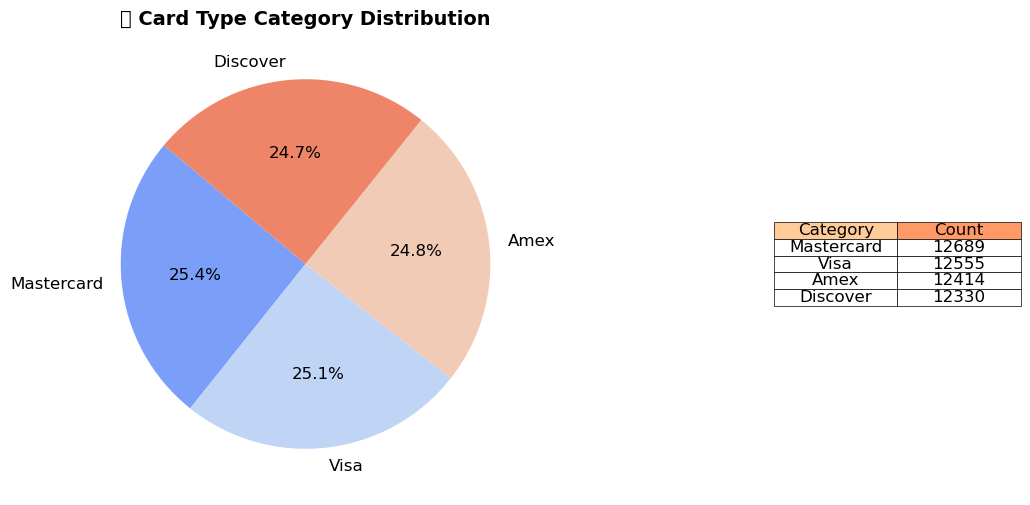

In [108]:
plot_pie_with_table("Card_Type", "🏪 Card Type Category Distribution")

### 🔹 2. Numerical Features Analysis

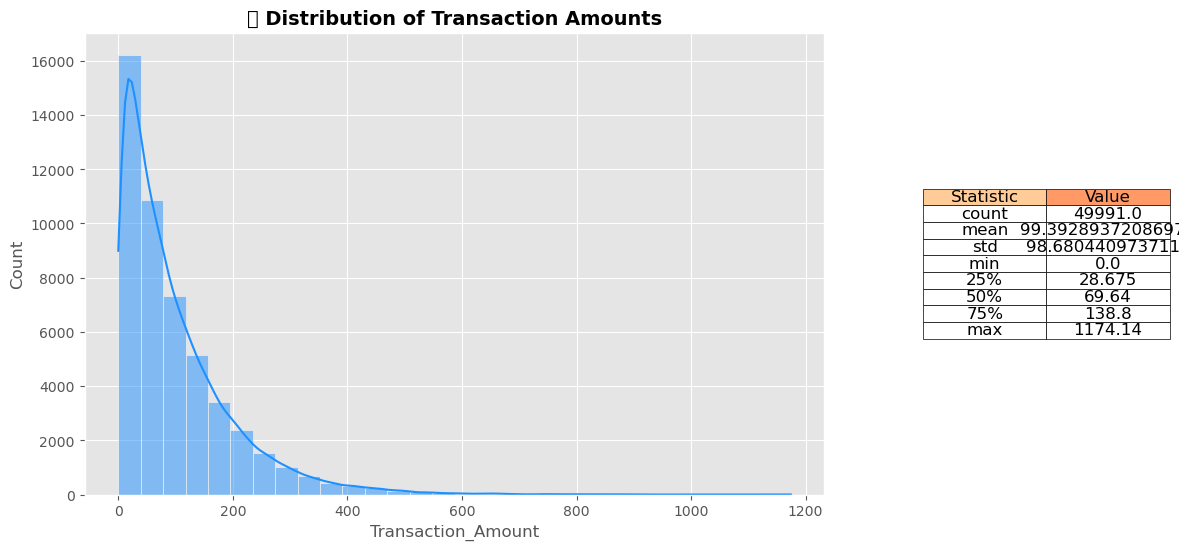

,Statistic,Value
0,count,49991.000000
1,mean,99.392894
2,std,98.680441
3,min,0.000000
4,25%,28.675000
5,50%,69.640000
6,75%,138.800000
7,max,1174.140000


In [109]:
def plot_hist_with_table(numeric_feature, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Histogram
    sns.histplot(df[numeric_feature], bins=30, kde=True, color="dodgerblue", ax=axes[0])
    axes[0].set_title(title, fontsize=14, fontweight="bold")
    axes[0].set_xlabel(numeric_feature)
    axes[0].set_ylabel("Count")

    # Summary statistics table
    summary_table = df[numeric_feature].describe().reset_index()
    summary_table.columns = ["Statistic", "Value"]

    # Hide axes for table
    axes[1].axis("tight")
    axes[1].axis("off")

    # Display table
    table = axes[1].table(cellText=summary_table.values,
                          colLabels=summary_table.columns,
                          cellLoc="center",
                          loc="center",
                          colColours=["#ffcc99", "#ff9966"])
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    plt.show()
    display(summary_table)

plot_hist_with_table("Transaction_Amount", "💰 Distribution of Transaction Amounts")

- The mean transaction amount is approximately 99.40, which is higher than the median (50th percentile) of 69.64. This indicates a right-skewed distribution, suggesting that there are some relatively high transaction amounts that are pulling the mean upwards

In [110]:
def plot_box_with_table(numeric_feature, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Boxplot
    sns.boxplot(df[numeric_feature], color="lightcoral", ax=axes[0])
    axes[0].set_title(title, fontsize=14, fontweight="bold")
    axes[0].set_xlabel(numeric_feature)

    # Summary statistics table
    summary_table = df[numeric_feature].describe().reset_index()
    summary_table.columns = ["Statistic", "Value"]

    # Hide axes for table
    axes[1].axis("tight")
    axes[1].axis("off")

    # Display table
    table = axes[1].table(cellText=summary_table.values,
                          colLabels=summary_table.columns,
                          cellLoc="center",
                          loc="center",
                          colColours=["#ffcc99", "#ff9966"])
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    plt.show()

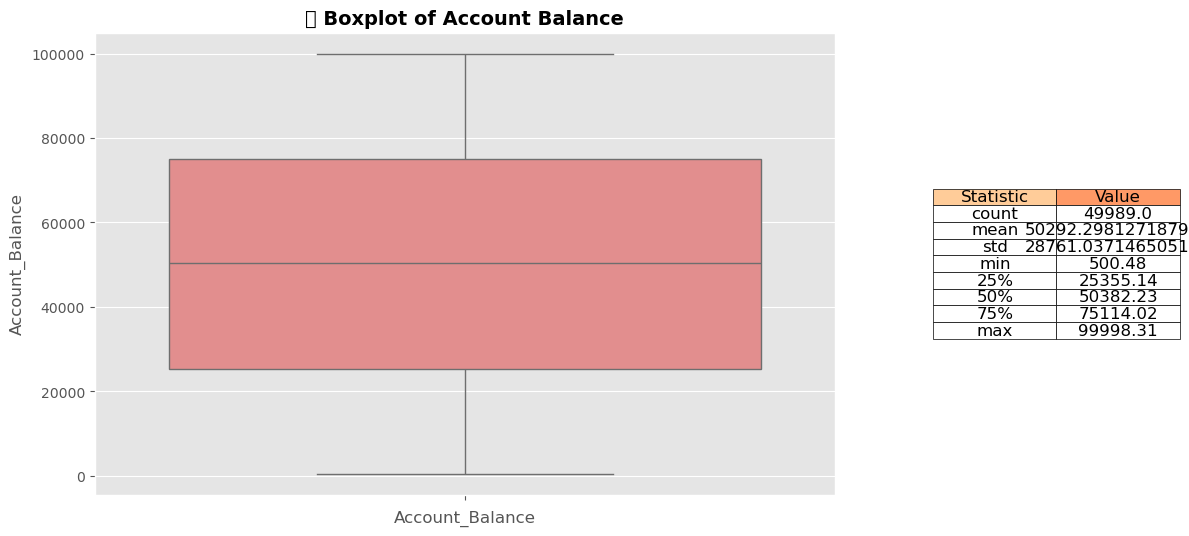

In [111]:
plot_box_with_table("Account_Balance", "📦 Boxplot of Account Balance")

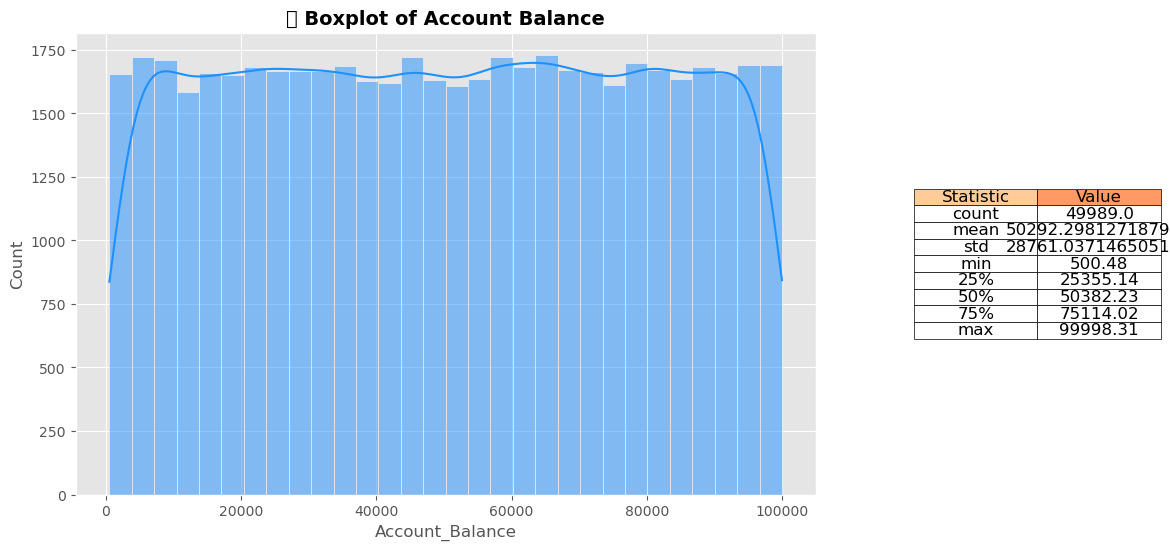

,Statistic,Value
0,count,49989.000000
1,mean,50292.298127
2,std,28761.037147
3,min,500.480000
4,25%,25355.140000
5,50%,50382.230000
6,75%,75114.020000
7,max,99998.310000


In [112]:
plot_hist_with_table("Account_Balance", "📦 Boxplot of Account Balance")

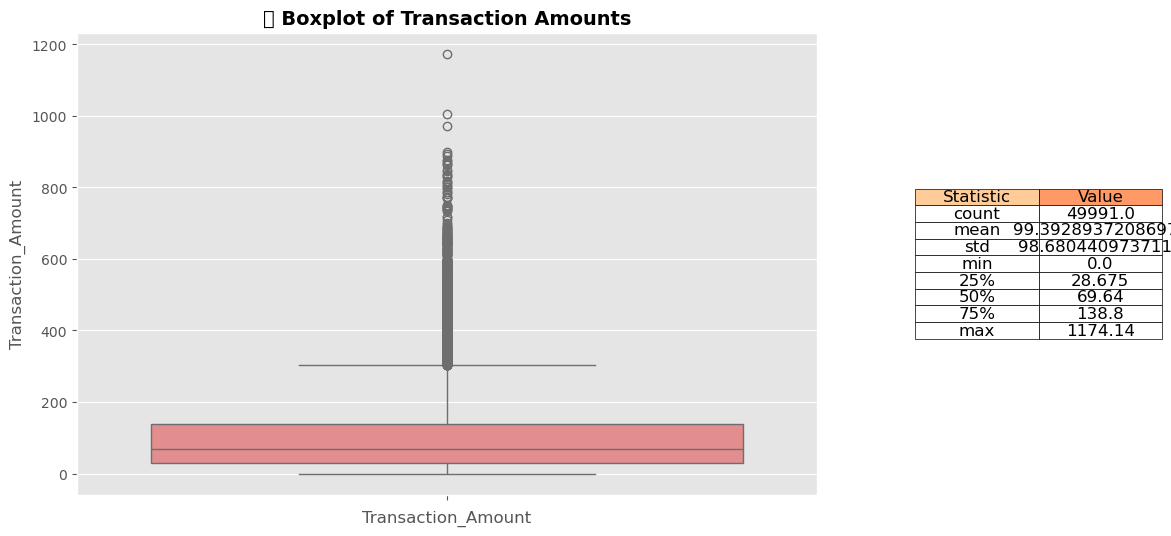

In [113]:
plot_box_with_table("Transaction_Amount", "📦 Boxplot of Transaction Amounts")

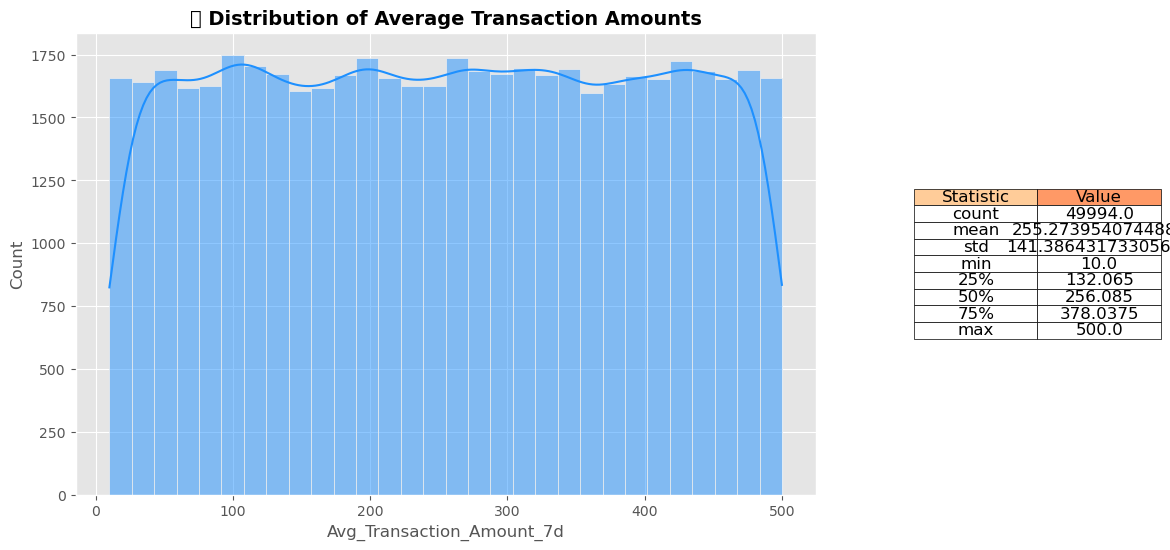

,Statistic,Value
0,count,49994.000000
1,mean,255.273954
2,std,141.386432
3,min,10.000000
4,25%,132.065000
5,50%,256.085000
6,75%,378.037500
7,max,500.000000


In [114]:
plot_hist_with_table("Avg_Transaction_Amount_7d", "💰 Distribution of Average Transaction Amounts")

- The minimum transaction amount is 10.00, while the maximum is 500.00. The 25th percentile (Q1) is 132.08, and the 75th percentile (Q3) is 378.06. The relatively narrow range between Q1 and Q3 (IQR = 245.98) compared to the overall range suggests that the bulk of transactions lie within this interquartile range, with few extreme values

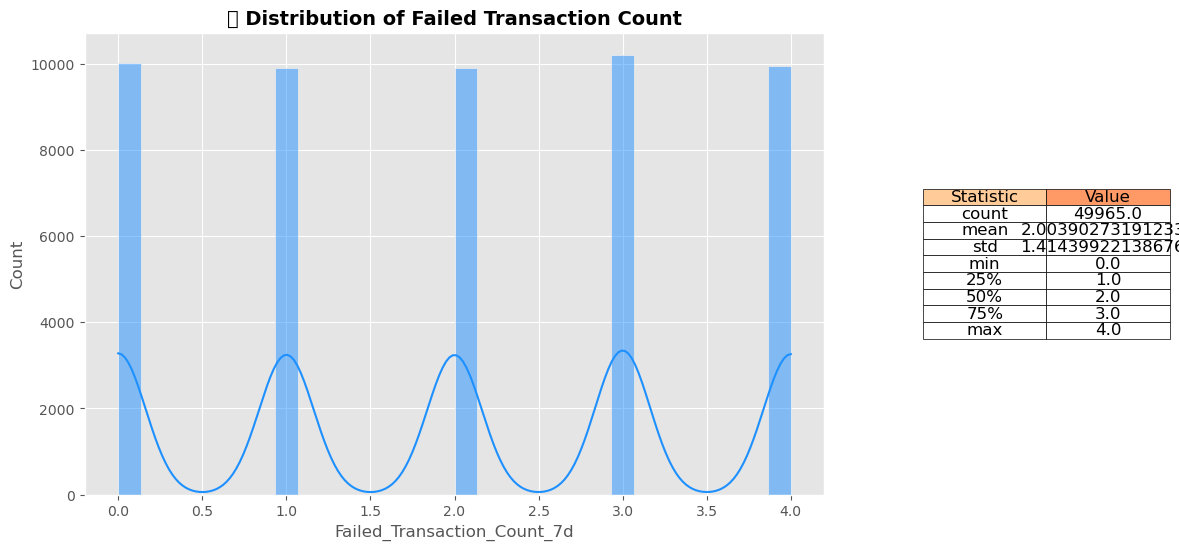

,Statistic,Value
0,count,49965.000000
1,mean,2.003903
2,std,1.414399
3,min,0.000000
4,25%,1.000000
5,50%,2.000000
6,75%,3.000000
7,max,4.000000


In [115]:
plot_hist_with_table("Failed_Transaction_Count_7d", "💰 Distribution of Failed Transaction Count")

- The minimum transaction amount is 0.00, while the maximum is 4.00. The interquartile range (IQR) is from 1.00 (25th percentile) to 3.00 (75th percentile), indicating that the majority of transactions fall within this range. The narrow range of values (0 to 4) suggests that there are few outliers.

In [116]:
def plot_violin_with_table(numeric_feature, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Violin Plot
    sns.violinplot(y=df[numeric_feature], color="seagreen", ax=axes[0])
    axes[0].set_title(title, fontsize=14, fontweight="bold")
    axes[0].set_ylabel(numeric_feature)

    # Summary statistics table
    summary_table = df[numeric_feature].describe().reset_index()
    summary_table.columns = ["Statistic", "Value"]

    # Hide axes for table
    axes[1].axis("tight")
    axes[1].axis("off")

    # Display table
    table = axes[1].table(cellText=summary_table.values,
                          colLabels=summary_table.columns,
                          cellLoc="center",
                          loc="center",
                          colColours=["#ffcc99", "#ff9966"])
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    plt.show()

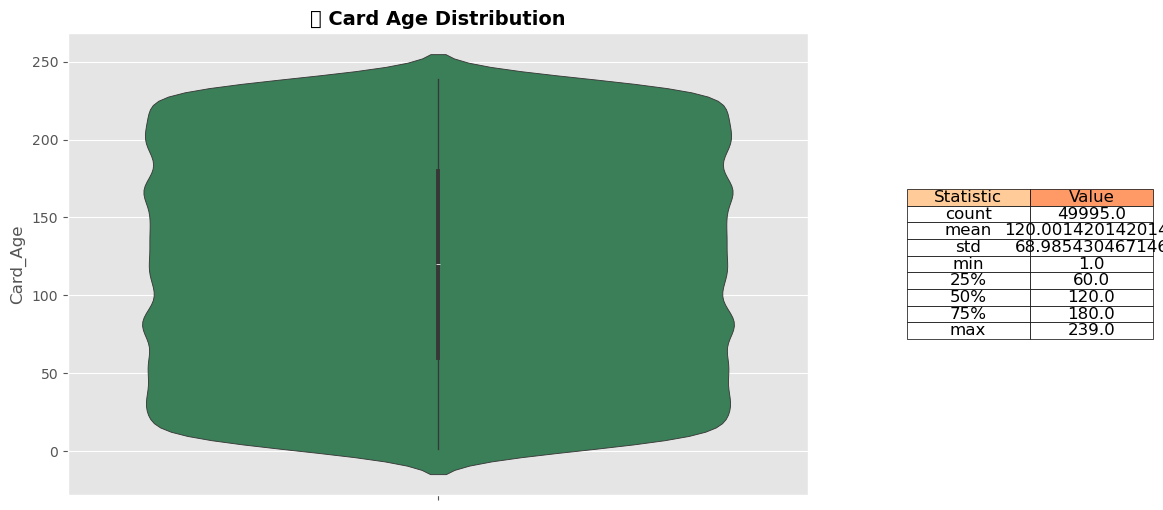

In [117]:
plot_violin_with_table("Card_Age", "🎻 Card Age Distribution")

- The mean (120.00) is close to the median (120.00), indicating a symmetric distribution with no significant skewness.

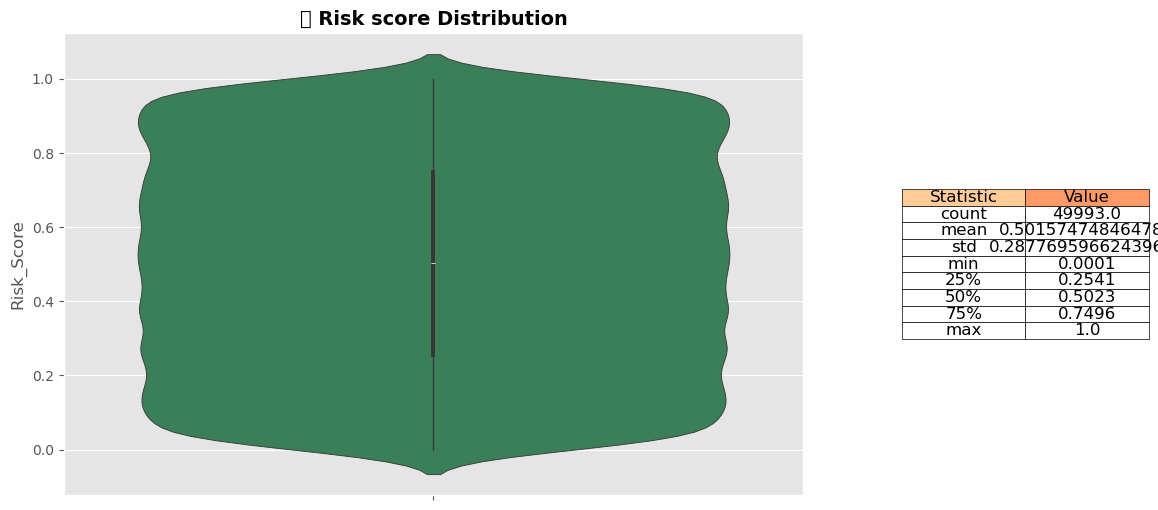

In [118]:
plot_violin_with_table("Risk_Score", "🎻 Risk score Distribution")

- The mean (0.501) is close to the median (0.502, indicating a symmetric distribution with no significant skewness.

### Bivariate Analysis

In [119]:
def plot_violin_with_stats(numeric_feature, category_feature, title):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=category_feature, y=numeric_feature, data=df, palette="coolwarm", inner="quartile")
    
    # Add mean and median values as annotations
    stats = df.groupby(category_feature)[numeric_feature].describe()
    for idx, cat in enumerate(stats.index):
        mean_val = stats.loc[cat, "mean"]
        median_val = stats.loc[cat, "50%"]
        plt.text(idx, mean_val, f"Mean: {mean_val:.2f}", ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
        plt.text(idx, median_val, f"Median: {median_val:.2f}", ha='center', va='top', fontsize=12, color='red', fontweight='bold')

    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel(category_feature)
    plt.ylabel(numeric_feature)
    plt.show()

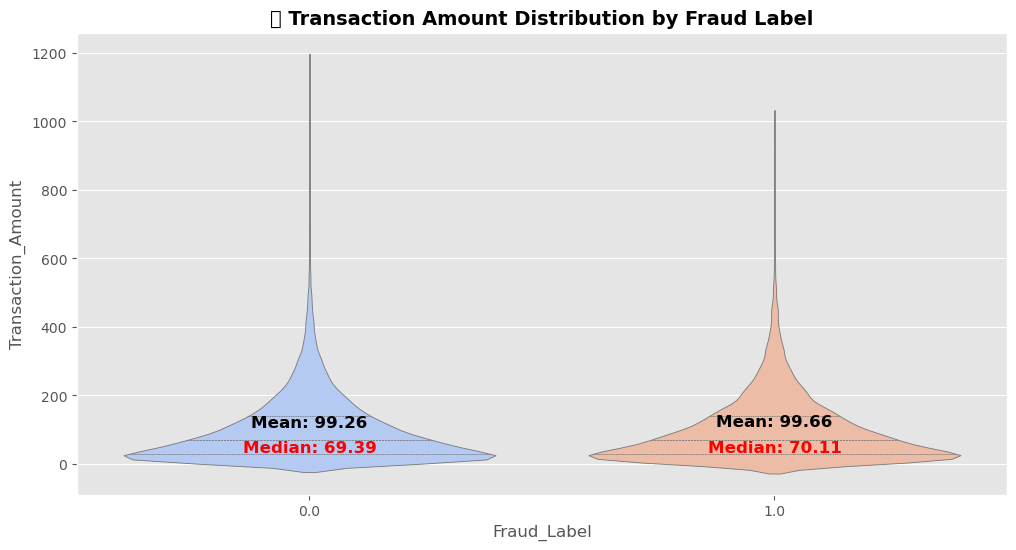

In [120]:
plot_violin_with_stats("Transaction_Amount", "Fraud_Label", "💰 Transaction Amount Distribution by Fraud Label")

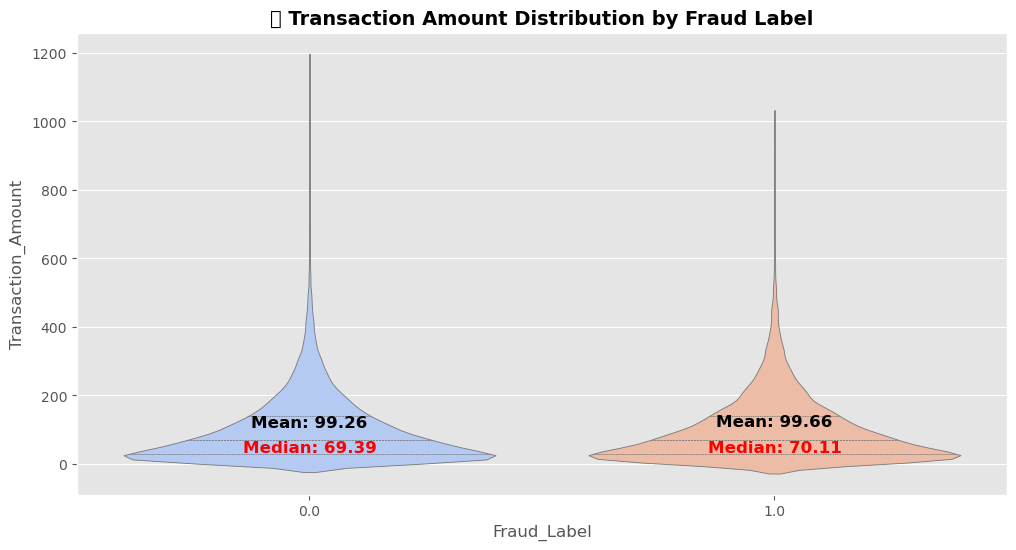

In [121]:
plot_violin_with_stats("Transaction_Amount", "Fraud_Label", "💰 Transaction Amount Distribution by Fraud Label")

- The mean transaction amounts for both labels (fraudulent: 99.66, non-fraudulent: 99.26) are quite close, indicating that the average transaction amounts do not differ significantly between fraudulent and non-fraudulent transactions.

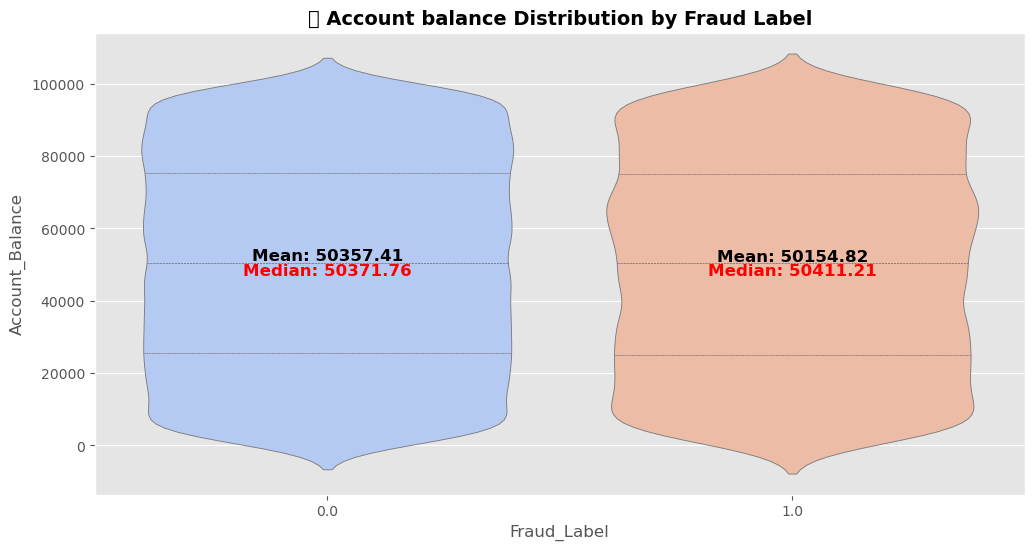

In [122]:
plot_violin_with_stats("Account_Balance", "Fraud_Label", "💰 Account balance Distribution by Fraud Label")

- The mean account balances for both labels are quite similar (fraudulent: 50,154.82, non-fraudulent: 50,357.41), indicating that average account balances do not significantly differ between fraudulent and non-fraudulent accounts.

In [123]:
def plot_box_with_table(numeric_feature, category_feature, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Boxplot
    sns.boxplot(x=category_feature, y=numeric_feature, data=df, ax=axes[0], palette="coolwarm")
    axes[0].set_title(title, fontsize=14, fontweight="bold")
    axes[0].set_xlabel(category_feature)
    axes[0].set_ylabel(numeric_feature)

    # Summary statistics table
    summary_table = df.groupby(category_feature)[numeric_feature].describe()[["mean", "50%", "min", "max"]].reset_index()
    summary_table.columns = [category_feature, "Mean", "Median", "Min", "Max"]

    # Hide axes for table
    axes[1].axis("tight")
    axes[1].axis("off")

    # **✅ Fix: Dynamically set colColours to match column count**
    col_count = len(summary_table.columns)
    colColours = ["#ffcc99"] * col_count  # Ensure correct length

    # Display table
    table = axes[1].table(cellText=summary_table.values,
                          colLabels=summary_table.columns,
                          cellLoc="center",
                          loc="center",
                          colColours=colColours)
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    plt.show()
    display(summary_table)

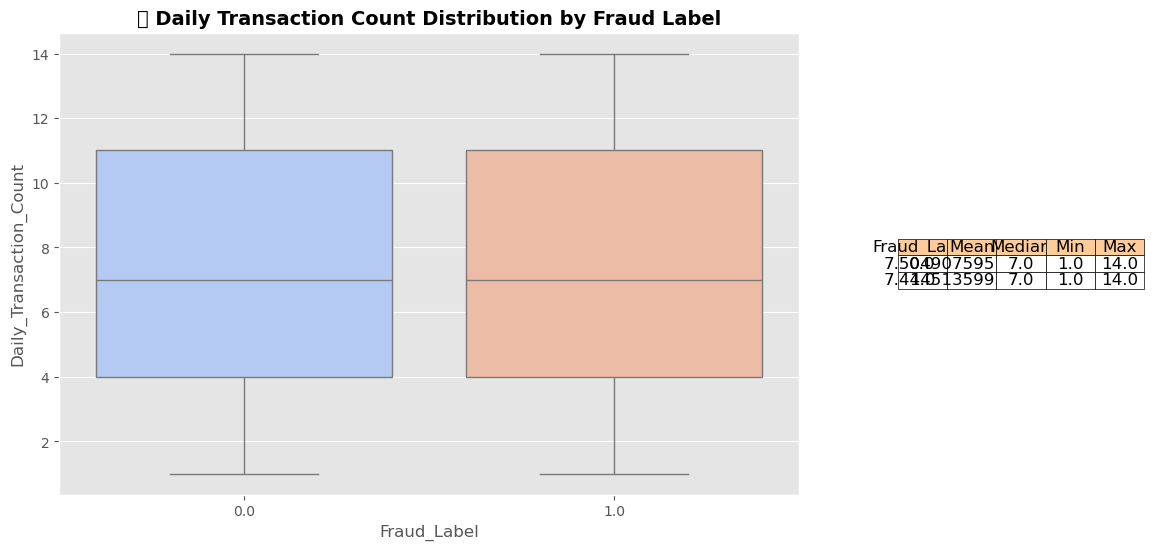

,Fraud_Label,Mean,Median,Min,Max
0,0.0,7.504908,7.0,1.0,14.0
1,1.0,7.444514,7.0,1.0,14.0


In [124]:
plot_box_with_table("Daily_Transaction_Count", "Fraud_Label", "💰 Daily Transaction Count Distribution by Fraud Label")

- The mean transaction amounts for both labels are very close (fraudulent: 7.44, non-fraudulent: 7.50), indicating that average transaction amounts do not significantly differ between fraudulent and non-fraudulent transactions.

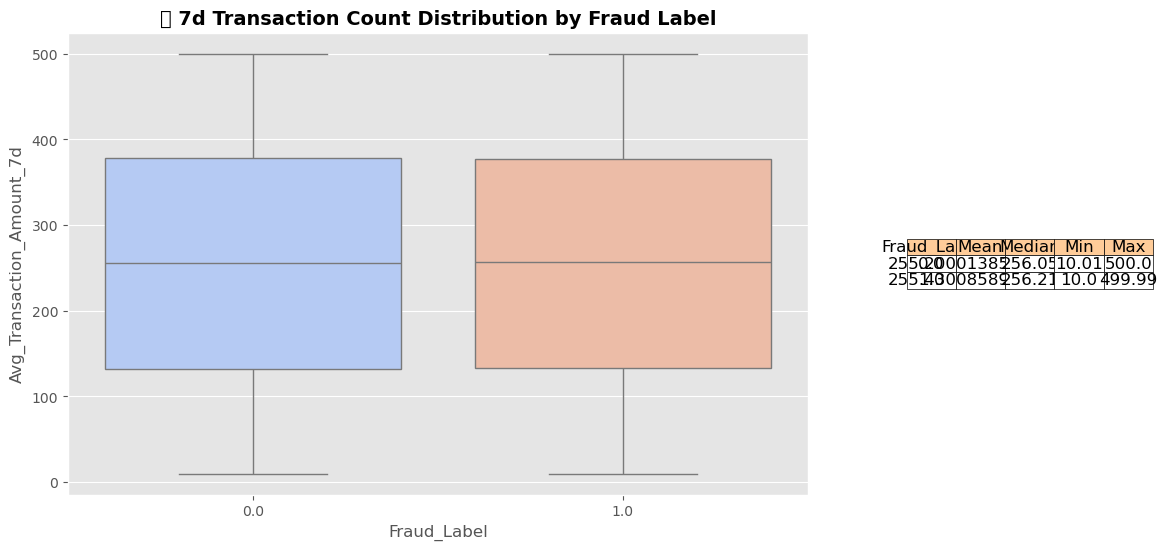

,Fraud_Label,Mean,Median,Min,Max
0,0.0,255.200014,256.05,10.01,500.00
1,1.0,255.430086,256.21,10.00,499.99


In [125]:
plot_box_with_table("Avg_Transaction_Amount_7d", "Fraud_Label", "💰 7d Transaction Count Distribution by Fraud Label")

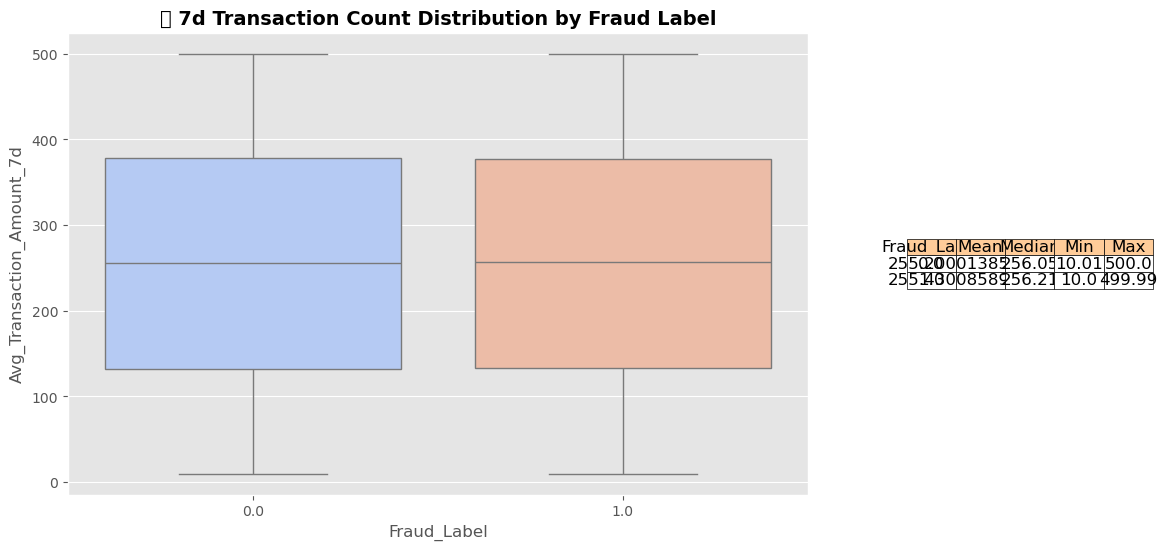

,Fraud_Label,Mean,Median,Min,Max
0,0.0,255.200014,256.05,10.01,500.00
1,1.0,255.430086,256.21,10.00,499.99


In [126]:
plot_box_with_table("Avg_Transaction_Amount_7d", "Fraud_Label", "💰 7d Transaction Count Distribution by Fraud Label")

- The mean transaction amounts are very similar for both labels (fraudulent: 255.43, non-fraudulent: 255.20) and the medians are also close (fraudulent: 256.21, non-fraudulent: 256.05).

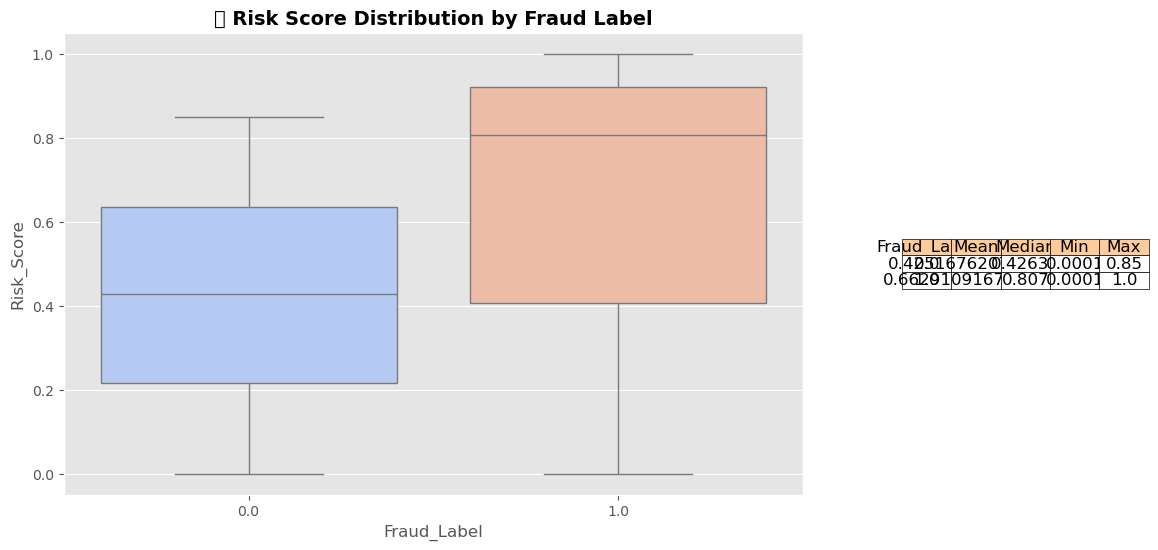

,Fraud_Label,Mean,Median,Min,Max
0,0.0,0.425168,0.42635,0.0001,0.85
1,1.0,0.662911,0.80700,0.0001,1.00


In [127]:
plot_box_with_table("Risk_Score", "Fraud_Label", "💰 Risk Score Distribution by Fraud Label")

- Non-Fraud (Label 0): The mean risk score is 0.425168.
- Fraud (Label 1): The mean risk score is significantly higher at 0.662911.
Observation: This indicates that, on average, fraudulent cases have higher risk scores compared to non-fraudulent cases

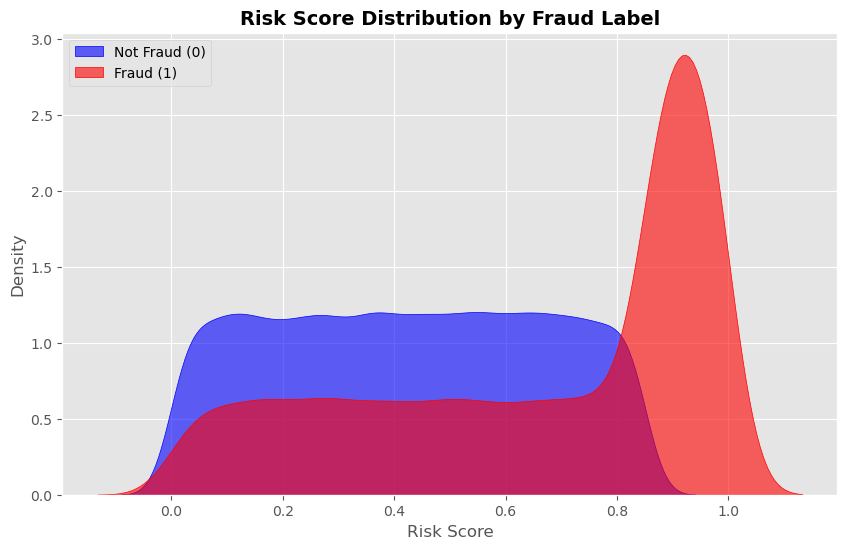

In [128]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Fraud_Label"] == 0]["Risk_Score"], shade=True, color="blue", label="Not Fraud (0)", alpha=0.6)
sns.kdeplot(df[df["Fraud_Label"] == 1]["Risk_Score"], shade=True, color="red", label="Fraud (1)", alpha=0.6)
plt.title("Risk Score Distribution by Fraud Label", fontsize=14, fontweight="bold")
plt.xlabel("Risk Score")
plt.ylabel("Density")
plt.legend()
plt.show()

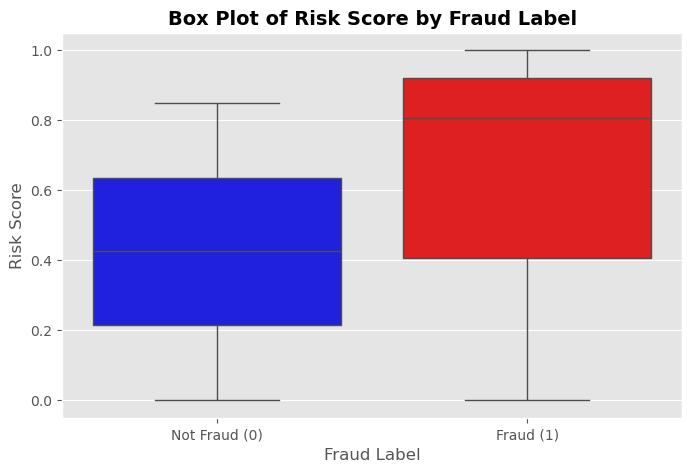

In [129]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Fraud_Label", y="Risk_Score", data=df, palette=["blue", "red"])
plt.title("Box Plot of Risk Score by Fraud Label", fontsize=14, fontweight="bold")
plt.xlabel("Fraud Label")
plt.ylabel("Risk Score")
plt.xticks(ticks=[0, 1], labels=["Not Fraud (0)", "Fraud (1)"])
plt.show()

In [130]:
risk_summary = df.groupby("Fraud_Label")["Risk_Score"].describe()[["mean", "50%", "min", "max"]]
risk_summary.columns = ["Mean Risk Score", "Median (50%)", "Min", "Max"]
display(risk_summary)

,Mean Risk Score,Median (50%),Min,Max
Fraud_Label,,,,
0.0,0.425168,0.42635,0.0001,0.85
1.0,0.662911,0.80700,0.0001,1.00


In [131]:
num_features = [
    "IP_Address_Flag", "Previous_Fraudulent_Activity", "Daily_Transaction_Count", 
    "Failed_Transaction_Count_7d", "Card_Age", "Transaction_Distance", "Is_Weekend"
]

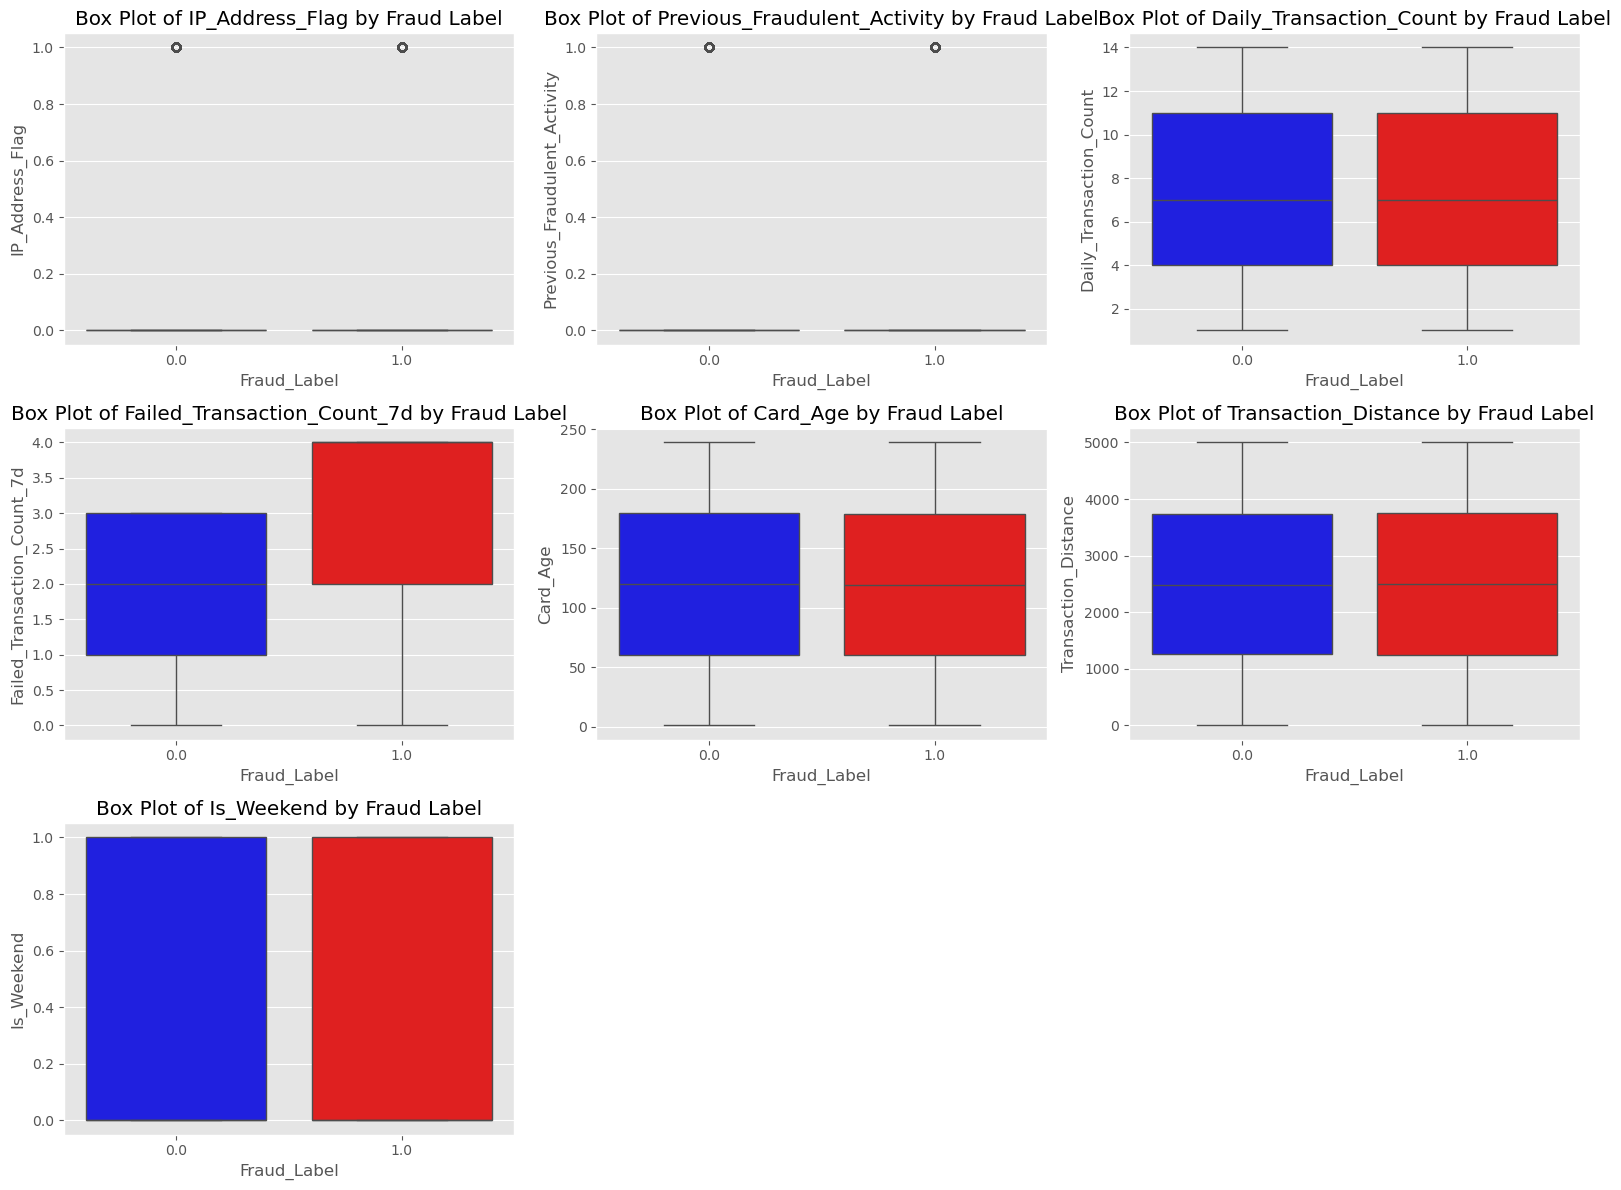

In [132]:

plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Fraud_Label", y=feature, data=df, palette=["blue", "red"])
    plt.title(f"Box Plot of {feature} by Fraud Label")
plt.tight_layout()
plt.show()

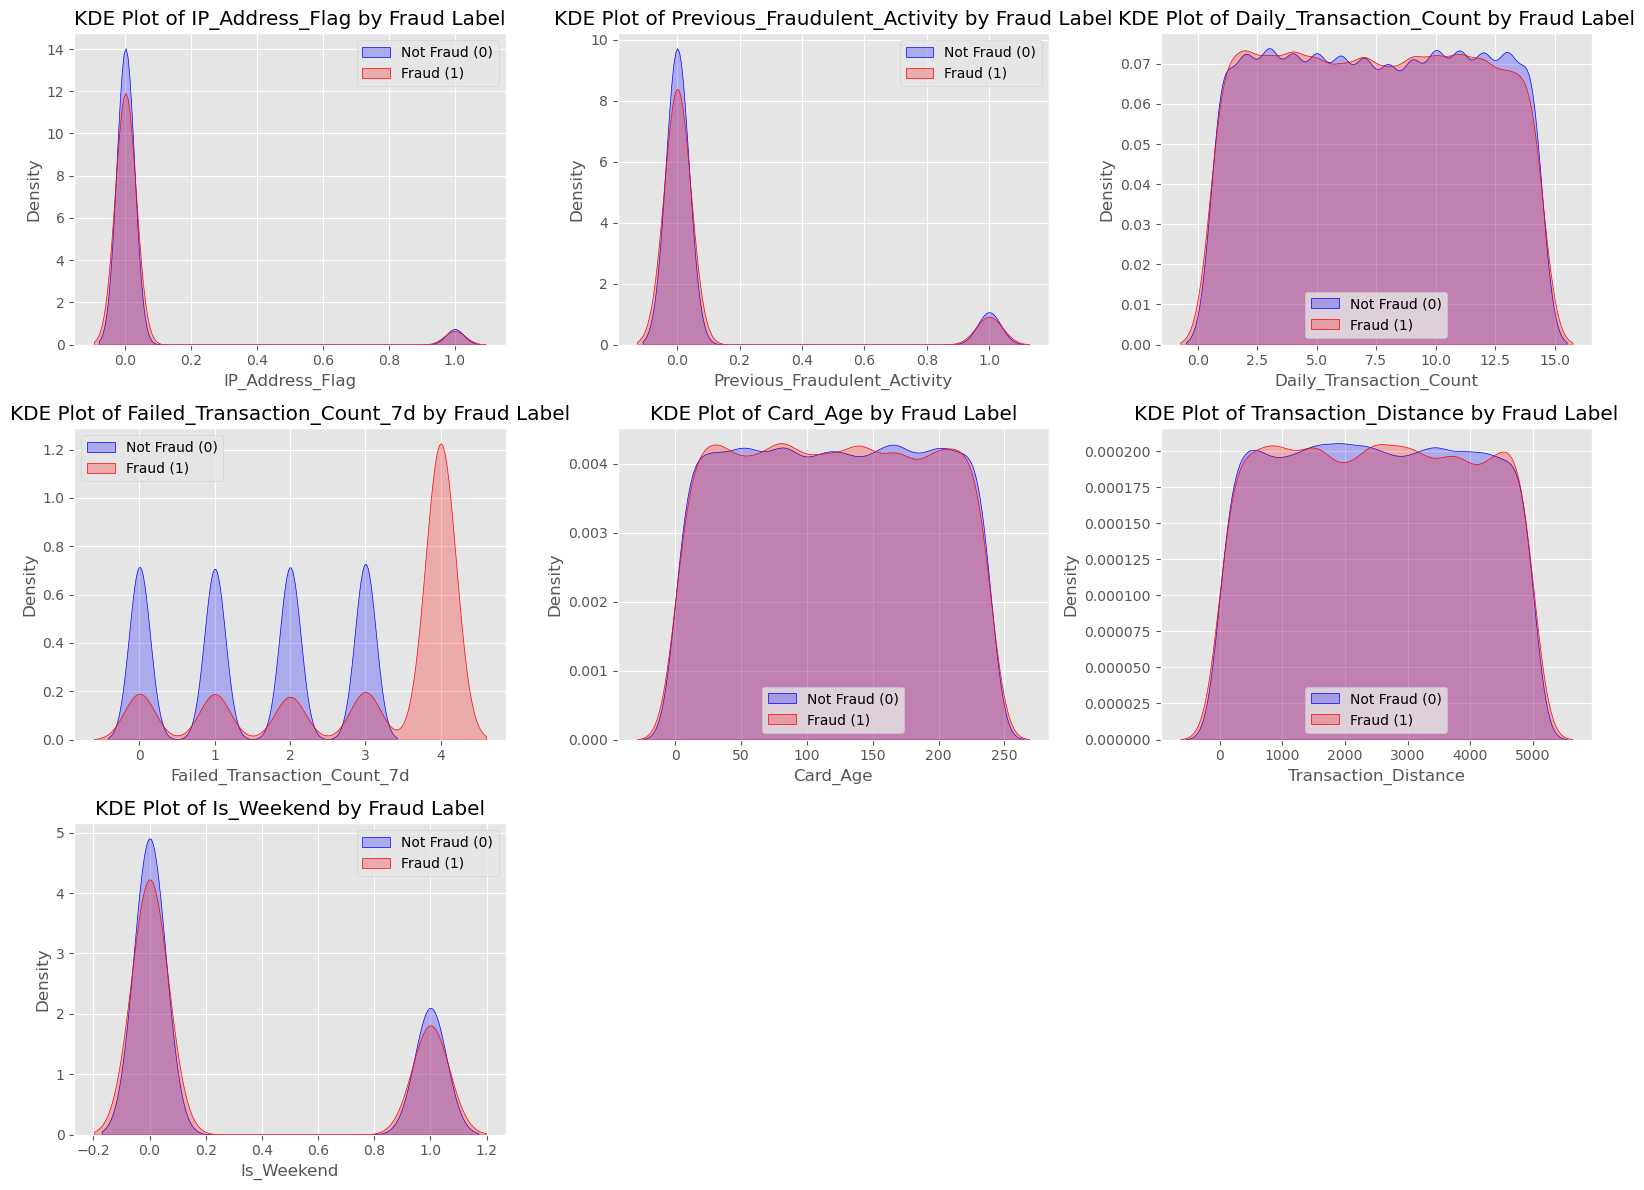

In [133]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(df[df["Fraud_Label"] == 0][feature], shade=True, color="blue", label="Not Fraud (0)")
    sns.kdeplot(df[df["Fraud_Label"] == 1][feature], shade=True, color="red", label="Fraud (1)")
    plt.title(f"KDE Plot of {feature} by Fraud Label")
    plt.legend()
plt.tight_layout()
plt.show()

## Multivariate Analysis

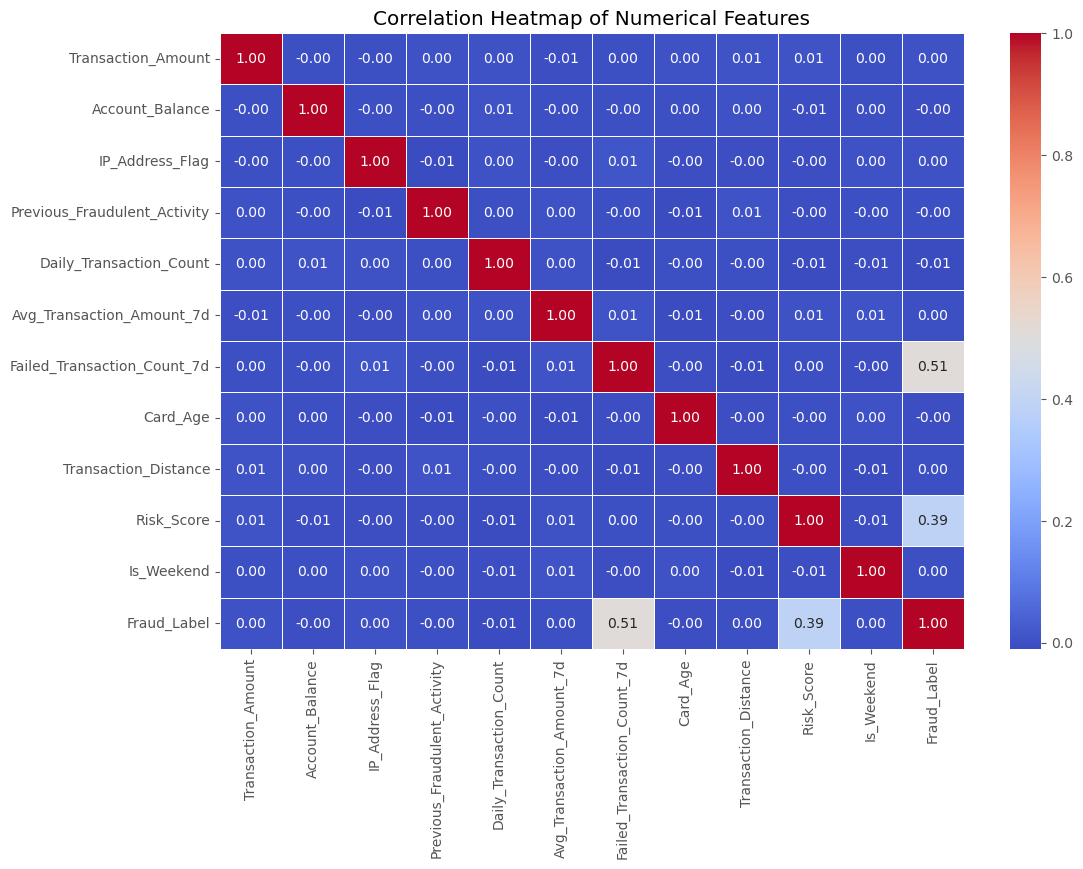

In [134]:
# Selecting only numerical columns
num_cols = [
    "Transaction_Amount", "Account_Balance", "IP_Address_Flag", "Previous_Fraudulent_Activity",
    "Daily_Transaction_Count", "Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d",
    "Card_Age", "Transaction_Distance", "Risk_Score", "Is_Weekend", "Fraud_Label"
]

# Compute correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## Observations from the Correlation Matrix

1. **🔴 Strongest Correlation with Fraud_Label:**  
   - **🟢 `Failed_Transaction_Count_7d` (0.5097)** has the highest **positive correlation** with `Fraud_Label`, indicating that a **higher number of failed transactions in the last 7 days is a strong predictor of fraud**.  
   - **🟡 `Risk_Score` (0.3858)** also has a **strong correlation** with fraud, meaning the risk assessment model is capturing fraudulent behavior effectively.

2. **🟠 Weak Correlations Overall:**  
   - Most features have **weak or negligible correlations** with fraud and each other, implying a lack of strong **linear relationships**.

3. **🔵 `Transaction_Amount` and Fraud:**  
   - **⚪ `Transaction_Amount` (0.0019)** has almost **no correlation** with fraud, meaning fraudulent transactions do not necessarily involve **higher or lower amounts**.

4. **🟣 `Account_Balance` and Fraud:**  
   - **🔻 `Account_Balance` (-0.0033)** shows a very weak **negative correlation** with fraud, suggesting that available balance **does not strongly influence fraud detection**.

5. **🔴 `Previous_Fraudulent_Activity` is Not a Strong Indicator of Fraud:**  
   - **⚠️ `Previous_Fraudulent_Activity` (-0.0008)** has almost **zero correlation** with fraud, which is **unexpected**.  
   - This suggests that past fraudulent behavior **alone is not enough** to predict fraud in this dataset.

6. **🟠 `Daily_Transaction_Count` and Fraud:**  
   - **🔻 `Daily_Transaction_Count` (-0.0069)** has a weak **negative correlation** with fraud, implying that **frequent transactions are not necessarily fraudulent**.

7. **🟡 `IP_Address_Flag` and Fraud:**  
   - **🔸 `IP_Address_Flag` (0.0030)** has a very **weak positive correlation** with fraud, meaning **suspicious IP activity alone is not a strong fraud indicator**.

8. **🔵 `Transaction_Distance` is Unrelated to Fraud:**  
   - **⚪ `Transaction_Distance` (0.00004)** is almost **uncorrelated** with fraud, suggesting that fraud is **not necessarily linked to location changes**.

---

### ✅ Key Takeaways:
- **🟢 `Failed_Transaction_Count_7d` and `Risk_Score` are the best predictors of fraud.**
- **🔴 Most other features have weak or negligible correlations with fraud.**
- **🟠 Further analysis (e.g., PCA, decision trees, or ML models) may be needed to capture non-linear patterns.**


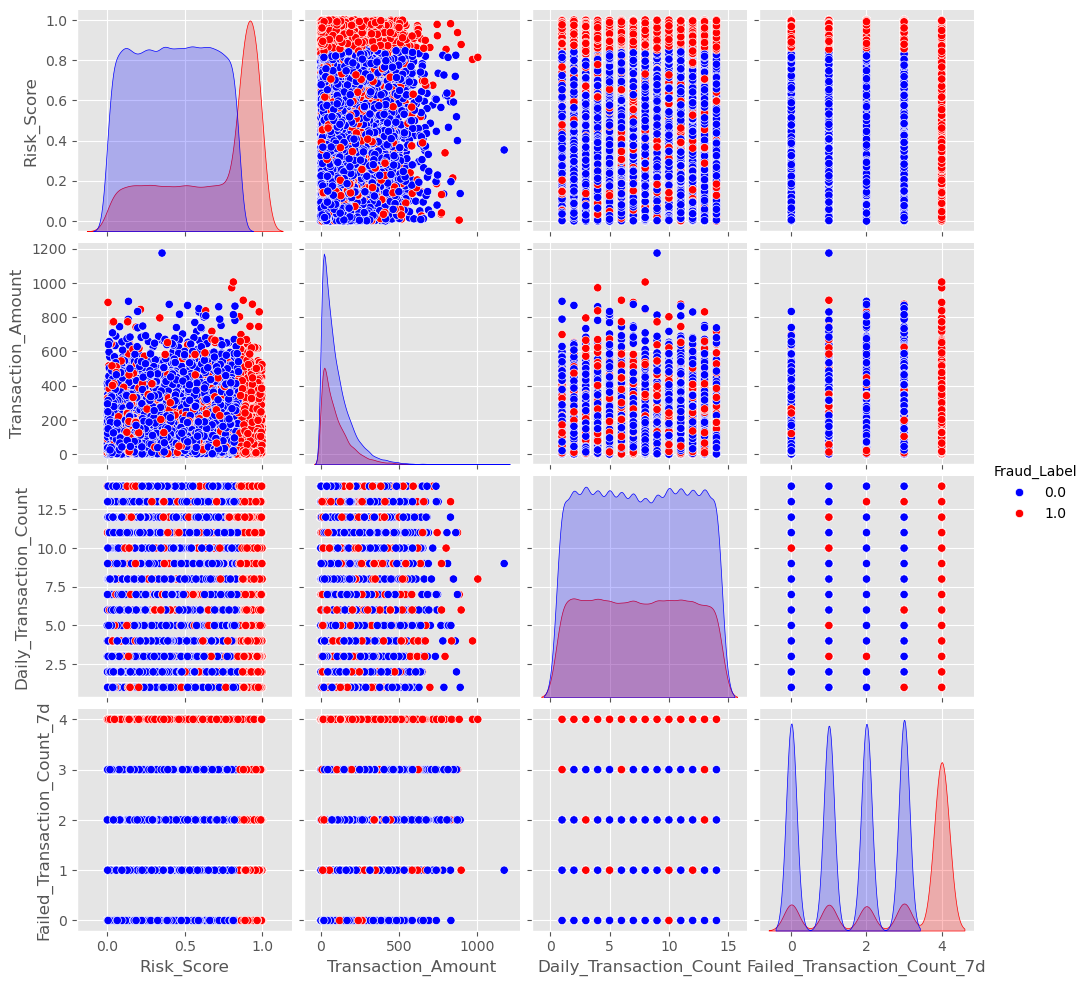

In [135]:

# Select a subset of important features
subset_features = ["Risk_Score", "Transaction_Amount", "Daily_Transaction_Count", "Failed_Transaction_Count_7d", "Fraud_Label"]

sns.pairplot(df[subset_features], hue="Fraud_Label", palette=["blue", "red"])
plt.show()

####  Categorical Feature Analysis


🔍 **Fraud Percentage Across Categorical Features:**


,,,,


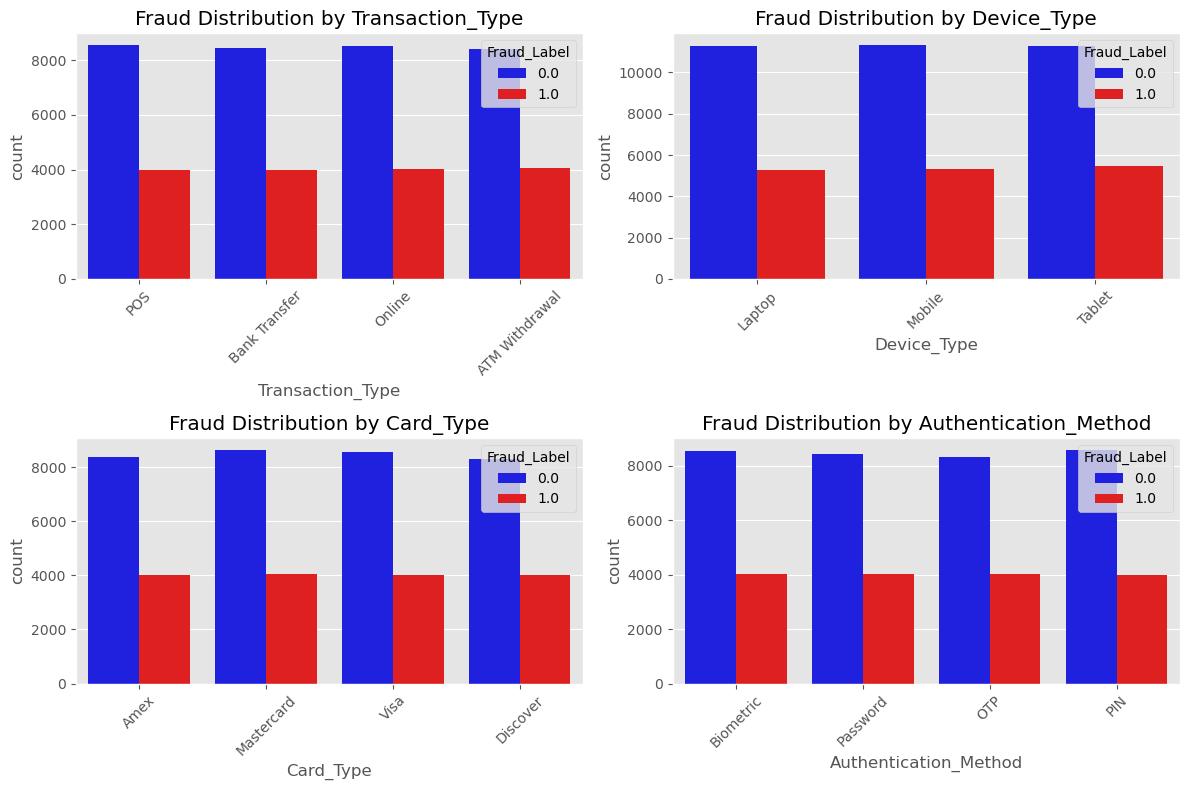

In [136]:
# Define categorical features
cat_features = ["Transaction_Type", "Device_Type", "Card_Type", "Authentication_Method"]

# 🟢 Create a summary table
summary_table = pd.DataFrame()

for feature in cat_features:
    temp_df = df.groupby(feature)["Fraud_Label"].value_counts(normalize=True).unstack() * 100
    temp_df.columns = ["Non-Fraud %", "Fraud %"]
    summary_table = pd.concat([summary_table, temp_df], keys=[feature])

# Display the table
print("\n🔍 **Fraud Percentage Across Categorical Features:**")
display(summary_table)  # Works in Jupyter Notebook; use print(summary_table) otherwise

# 📊 **Visualization - Fraud Distribution by Categorical Features**
plt.figure(figsize=(12, 8))

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue="Fraud_Label", data=df, palette=["blue", "red"])
    plt.xticks(rotation=45)
    plt.title(f"Fraud Distribution by {feature}")

plt.tight_layout()
plt.show()

## **Data Preprocessing**

## Handling Missing Values

### 📌 Drop Rows with ≤ 0.01% Missing Data

In [137]:
df.dropna(subset=["Risk_Score", "Previous_Fraudulent_Activity", "IP_Address_Flag", 
                  "Daily_Transaction_Count", "Avg_Transaction_Amount_7d", 
                  "Transaction_ID", "Card_Age", "User_ID", "Transaction_Distance",
                  "Is_Weekend", "Fraud_Label"], inplace=True)

### 📌 Impute Missing Values for Columns > 0.01%

Numerical Imputation (Median)

In [138]:
num_cols = ["Failed_Transaction_Count_7d", "Account_Balance", "Transaction_Amount"]
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

Categorical Imputation (Mode)

In [139]:
cat_cols = ["Location", "Device_Type", "Merchant_Category", "Authentication_Method", "Transaction_Type", "Card_Type"]
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop rows with missing timestamps
df.dropna(subset=["Timestamp"], inplace=True)

✅ Final Check

In [140]:
print("Remaining Missing Values:\n", df.isnull().sum().sum())  # Should print 0

Remaining Missing Values:
 0


##  Drop duplicate values

In [141]:
df.drop_duplicates(inplace=True)

✅ Final Check for Duplicates

In [142]:
print("Total Duplicate Rows After Removal:", df.duplicated().sum())

Total Duplicate Rows After Removal: 0


## PCA (Principal Component Analysis)

PCA is useful for reducing dimensionality while preserving variance. In your case, PCA can be applied to numeric features to analyze key patterns affecting fraud detection.

In [143]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

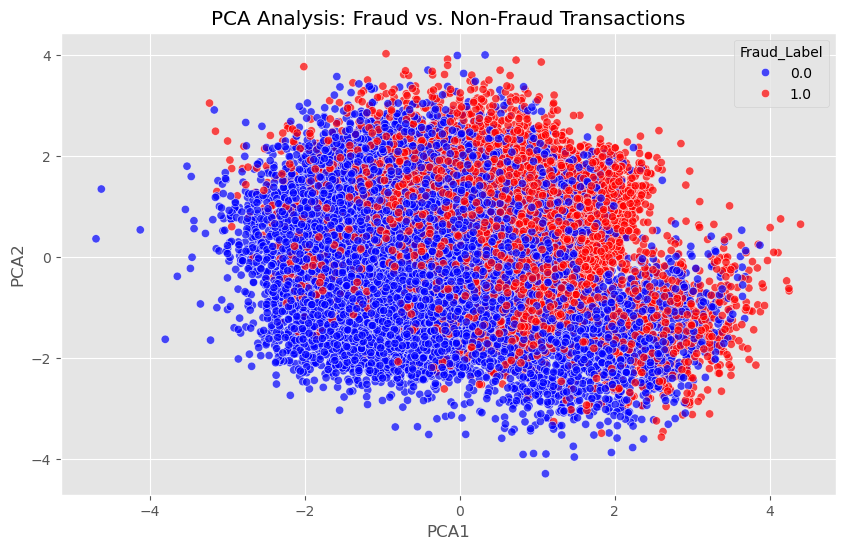

Explained Variance Ratio: [0.10207368 0.10163926]


In [144]:
num_features = [
    "Transaction_Amount", "Account_Balance", "IP_Address_Flag",
    "Previous_Fraudulent_Activity", "Daily_Transaction_Count",
    "Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d",
    "Card_Age", "Transaction_Distance", "Risk_Score"
]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_features].dropna())  # Drop NaNs before PCA

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=["PCA1", "PCA2"])
pca_df["Fraud_Label"] = df["Fraud_Label"].values  # Adding fraud label for visualization

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Fraud_Label", palette=["blue", "red"], data=pca_df, alpha=0.7)
plt.title("PCA Analysis: Fraud vs. Non-Fraud Transactions")
plt.show()

# Check explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

### PCA1 explains 10.21% of the total variance in the dataset.
### PCA2 explains 10.16% of the total variance
### Combined, PCA1 and PCA2 explain ~20.37% of the variance.


### Low Variance Explained → PCA1 and PCA2 together only capture ~20% of the total variance.
### No dominant component → The dataset does not have a few strong patterns dominating the variance. Instead, the variance is spread across many features.

In [145]:

# Apply PCA with 3 components
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(scaled_data)  # Assuming X is your preprocessed dataset
explained_variance_3 = np.sum(pca_3.explained_variance_ratio_)

# Apply PCA with 4 components
pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(scaled_data)
explained_variance_4 = np.sum(pca_4.explained_variance_ratio_)

# Apply PCA with 5 components
pca_5 = PCA(n_components=5)
X_pca_5 = pca_5.fit_transform(scaled_data)
explained_variance_5 = np.sum(pca_5.explained_variance_ratio_)

# Apply PCA with 5 components
pca_6 = PCA(n_components=6)
X_pca_6 = pca_6.fit_transform(scaled_data)
explained_variance_6 = np.sum(pca_6.explained_variance_ratio_)


# Print the variance explained by each
print(f"Explained Variance with 3 Components: {explained_variance_3:.4f}")
print(f"Explained Variance with 4 Components: {explained_variance_4:.4f}")
print(f"Explained Variance with 5 Components: {explained_variance_5:.4f}")
print(f"Explained Variance with 6 Components: {explained_variance_6:.4f}")

Explained Variance with 3 Components: 0.3051
Explained Variance with 4 Components: 0.4058
Explained Variance with 5 Components: 0.5059
Explained Variance with 6 Components: 0.6056


In [146]:
pca = PCA().fit(scaled_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)  # See how many components are needed for 90-95% variance

[0.10207368 0.20371294 0.3051163  0.40579125 0.50590286 0.60562587
 0.70511924 0.8040454  0.90238342 1.        ]


## To retain 90% variance, you need 9 components.

## Feature Scaling

In [147]:
## Since Risk_Score, Transaction_Amount, Transaction_Distance, and Account_Balance have different scales, we apply MinMax Scaling.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_features = ["Transaction_Amount", "Account_Balance", "Risk_Score", "Transaction_Distance"]

df[num_features] = scaler.fit_transform(df[num_features])

In [148]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,0.033889,POS,14-08-2023 19:30,0.931806,Laptop,Sydney,Travel,0.0,...,7.0,437.63,3.0,Amex,65.0,0.176595,Biometric,0.849385,0.0,0.0
1,TXN_9427,USER_7875,0.001014,Bank Transfer,07-06-2023 04:01,0.756044,Mobile,New York,Clothing,0.0,...,13.0,478.76,4.0,Mastercard,186.0,0.440650,Password,0.095810,0.0,1.0
2,TXN_199,USER_2734,0.024665,Online,20-06-2023 15:25,0.010940,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4.0,Visa,226.0,0.381832,Biometric,0.839984,0.0,1.0
3,TXN_12447,USER_2617,0.216601,ATM Withdrawal,07-12-2023 00:31,0.766918,Tablet,New York,Clothing,0.0,...,8.0,182.48,4.0,Visa,76.0,0.262339,OTP,0.793479,0.0,1.0
4,TXN_39489,USER_2014,0.026641,POS,11-11-2023 23:44,0.923178,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4.0,Mastercard,140.0,0.193358,Password,0.381838,1.0,1.0


## Dropping columns like Timestamp,Transaction_ID,User_ID, IP_Address_Flag

Dropping certain columns like Timestamp, Transaction_ID, User_ID, and IP_Address_Flag is a strategic decision in fraud detection modeling to improve model performance and avoid noise.

- A timestamp is a raw time record that doesn’t directly contribute to fraud detection.
- Transaction_ID 🔢 (Purely Unique Identifier)
- User_ID 🏷 (May Lead to Data Leakage) - If User_ID is included, the model may memorize fraud history instead of learning transaction patterns.
-  IP_Address_Flag 🌍 (High Variability, Low Predictability - Fraudsters intentionally manipulate IPs, making this an unreliable feature.

In [149]:
# Define columns to drop
drop_cols = ["Timestamp", "Transaction_ID", "User_ID", "IP_Address_Flag"]

# Drop the columns from the dataset
df_cleaned = df.drop(columns=drop_cols)

In [150]:
df_cleaned.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,0.033889,POS,0.931806,Laptop,Sydney,Travel,0.0,7.0,437.63,3.0,Amex,65.0,0.176595,Biometric,0.849385,0.0,0.0
1,0.001014,Bank Transfer,0.756044,Mobile,New York,Clothing,0.0,13.0,478.76,4.0,Mastercard,186.0,0.440650,Password,0.095810,0.0,1.0
2,0.024665,Online,0.010940,Tablet,Mumbai,Restaurants,0.0,14.0,50.01,4.0,Visa,226.0,0.381832,Biometric,0.839984,0.0,1.0
3,0.216601,ATM Withdrawal,0.766918,Tablet,New York,Clothing,0.0,8.0,182.48,4.0,Visa,76.0,0.262339,OTP,0.793479,0.0,1.0
4,0.026641,POS,0.923178,Mobile,Mumbai,Electronics,1.0,14.0,328.69,4.0,Mastercard,140.0,0.193358,Password,0.381838,1.0,1.0


In [151]:
df_cleaned.shape

(49963, 17)

In [152]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Transaction_Type',
 'Device_Type',
 'Location',
 'Merchant_Category',
 'Card_Type',
 'Authentication_Method']

### 📌 Encoding Categorical Variables in df_cleaned


- Use One-Hot Encoding for categorical features like "Transaction_Type", "Device_Type", "Card_type", "Authentication_Method", etc.
- Convert categorical values into binary columns (0/1).
- Drop the original categorical columns after encoding.

In [153]:
# Identify categorical columns
categorical_cols = ["Transaction_Type", "Device_Type", "Card_Type", "Authentication_Method", "Merchant_Category", "Location"]

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)  
# 👉 `drop_first=True` avoids multicollinearity (removes one category from each variable)

In [154]:
# Display the new dataset structure
df_encoded.head() # Check the first few rows

,Transaction_Amount,Account_Balance,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,...,Authentication_Method_PIN,Authentication_Method_Password,Merchant_Category_Electronics,Merchant_Category_Groceries,Merchant_Category_Restaurants,Merchant_Category_Travel,Location_Mumbai,Location_New York,Location_Sydney,Location_Tokyo
0,0.033889,0.931806,0.0,7.0,437.63,3.0,65.0,0.176595,0.849385,0.0,...,False,False,False,False,False,True,False,False,True,False
1,0.001014,0.756044,0.0,13.0,478.76,4.0,186.0,0.440650,0.095810,0.0,...,False,True,False,False,False,False,False,True,False,False
2,0.024665,0.010940,0.0,14.0,50.01,4.0,226.0,0.381832,0.839984,0.0,...,False,False,False,False,True,False,True,False,False,False
3,0.216601,0.766918,0.0,8.0,182.48,4.0,76.0,0.262339,0.793479,0.0,...,False,False,False,False,False,False,False,True,False,False
4,0.026641,0.923178,1.0,14.0,328.69,4.0,140.0,0.193358,0.381838,1.0,...,False,True,True,False,False,False,True,False,False,False


## Model building

<h2>🌳 Random Forest (RF) vs. 🚀 XGBoost (Extreme Gradient Boosting)</h2>

<h3>1️⃣ Random Forest (RF) 🌳</h3>
<p>Random Forest is an ensemble learning method that builds multiple decision trees and merges their results for better accuracy and stability. It helps reduce overfitting and improves generalization.</p>
<ul>
    <li><b>Bagging technique</b>: Uses bootstrapped samples to train individual trees.</li>
    <li><b>Feature randomness</b>: Each tree gets a random subset of features, reducing correlation.</li>
    <li><b>Strength</b>: Works well for large datasets and handles missing values efficiently.</li>
</ul>

<h3>2️⃣ XGBoost 🚀</h3>
<p>XGBoost is an advanced gradient boosting algorithm that optimizes speed and performance. It sequentially builds trees while correcting the errors of previous trees.</p>
<ul>
    <li><b>Boosting technique</b>: Trees are built sequentially, focusing on reducing errors.</li>
    <li><b>Regularization</b>: L1 & L2 regularization prevent overfitting.</li>
    <li><b>Strength</b>: Faster, efficient, and widely used in Kaggle competitions.</li>
</ul>

<h2>🆚 Which One to Choose?</h2>
<table border="1">
<tr>
<th>Criteria</th><th>Random Forest</th><th>XGBoost</th>
</tr>
<tr>
<td>Speed</td><td>Slower</td><td>Faster (optimized memory usage)</td>
</tr>
<tr>
<td>Overfitting</td><td>Less prone</td><td>Regularized (but still needs tuning)</td>
</tr>
<tr>
<td>Handling Missing Data</td><td>Efficient</td><td>Handles missing values natively</td>
</tr>
<tr>
<td>Feature Importance</td><td>Easy to interpret</td><td>Complex but powerful</td>
</tr>
</table>

<p><b>Conclusion:</b> <br>Both models are strong, but XGBoost is more suitable for competitive predictive tasks, while Random Forest is great for stability and interpretability.</p>


 ## Random Forest and XGBoost

In [155]:
# 🔹 Step 1: Splitting the dataset into features (X) and target variable (y)
X = df_encoded.drop(columns=['Fraud_Label'])  # Removing target variable from dataset to get features
y = df_encoded['Fraud_Label']  # Setting target variable (Fraud or Not Fraud)

In [156]:
# 🔹 Step 2: Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 👉 `stratify=y` ensures that fraud cases are equally distributed in train & test sets



### 🔹 Step 3: Random Forest Model with Hyperparameter Tuning ###
# Defining a set of hyperparameters for tuning
rf_params = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],       # Maximum depth of each tree
    'min_samples_split': [2, 5], # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2]   # Minimum samples required to be at a leaf node
}

# Initializing the Random Forest model
rf = RandomForestClassifier(random_state=42)

In [157]:
# Using GridSearchCV to find the best hyperparameters
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)  
# 👉 `cv=5` means 5-fold cross-validation (split data into 5 parts, train on 4, test on 1)
# 👉 `scoring='accuracy'` optimizes for accuracy
# 👉 `n_jobs=-1` utilizes all CPU cores for faster processing

In [158]:
# 🔹 Step 4: Training the Random Forest model with hyperparameter tuning
rf_cv.fit(X_train, y_train)  # Fit the model on training data using different parameter combinations

# 🔹 Step 5: Selecting the best model after tuning
rf_best = rf_cv.best_estimator_  # Get the best model based on tuning
y_pred_rf = rf_best.predict(X_test)  # Predict fraud labels on test data

In [159]:
# 🔹 Step 6: Model Performance Evaluation
accuracy = accuracy_score(y_test, y_pred_rf)  # Calculate accuracy
classification_rep = classification_report(y_test, y_pred_rf)  # Get precision, recall, F1-score
conf_matrix = confusion_matrix(y_test, y_pred_rf)  # Create confusion matrix


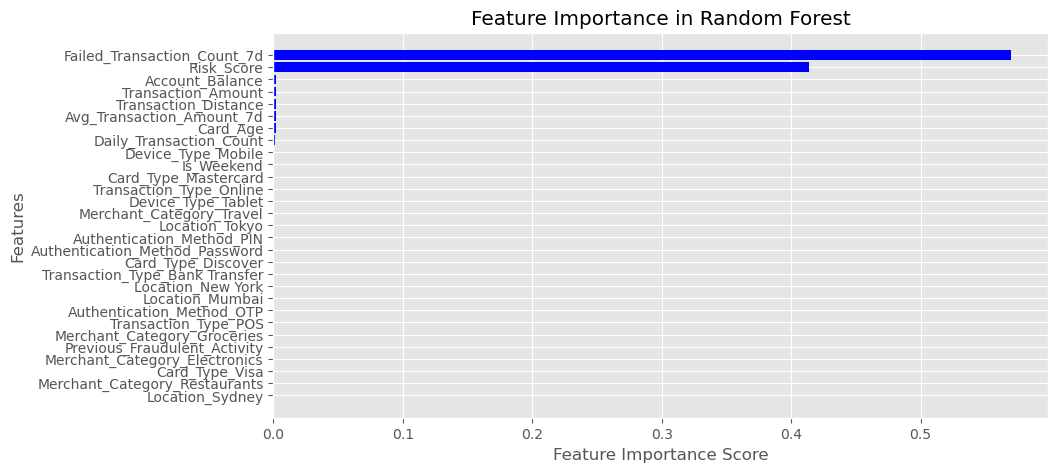

In [162]:
# Get Feature Importances
feature_importances = rf_best.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [163]:
# 🔹 Step 7: Displaying Results
print("🔹 Random Forest Best Parameters:", rf_cv.best_params_)  # Print best parameters from GridSearchCV
print("🔹 Random Forest Accuracy:", accuracy)  # Print accuracy of the model
print("🔹 Random Forest Classification Report:\n", classification_rep)  # Print precision, recall, and F1-score

🔹 Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
🔹 Random Forest Accuracy: 1.0
🔹 Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6780
         1.0       1.00      1.00      1.00      3213

    accuracy                           1.00      9993
   macro avg       1.00      1.00      1.00      9993
weighted avg       1.00      1.00      1.00      9993



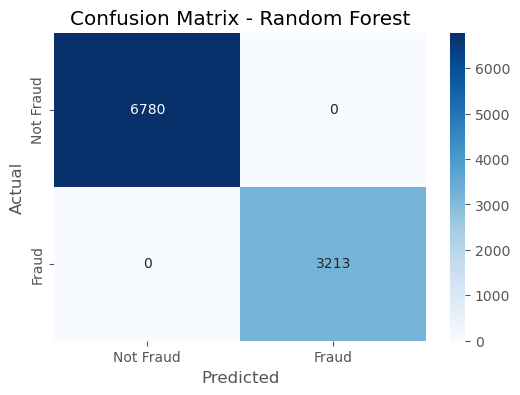

In [164]:
# 🔹 Step 8: Confusion Matrix Visualization
plt.figure(figsize=(6,4))  # Set figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])  # Plot confusion matrix
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix - Random Forest')  # Title
plt.show()  # Show plot

<h2>📊 Confusion Matrix - Random Forest</h2>

<table border="1" cellpadding="8" cellspacing="0">
  <tr>
    <th>Actual ↓ / Predicted →</th>
    <th>Non-Fraud (0)</th>
    <th>Fraud (1)</th>
  </tr>
  <tr>
    <td><b>Non-Fraud (0)</b></td>
    <td style="color:green;"><b>✅ TP</b> (Correctly classified non-fraud)</td>
    <td style="color:red;"><b>❌ FN</b> (Missed fraud cases)</td>
  </tr>
  <tr>
    <td><b>Fraud (1)</b></td>
    <td style="color:red;"><b>❌ FP</b> (Wrongly classified as fraud)</td>
    <td style="color:green;"><b>✅ TN</b> (Correctly classified fraud)</td>
  </tr>
</table>

<h3>🔍 Interpretation:</h3>
<ul>
  <li><b>✅ True Positives (TP):</b> Correctly identified non-fraud transactions.</li>
  <li><b>✅ True Negatives (TN):</b> Correctly identified fraudulent transactions.</li>
  <li><b>❌ False Positives (FP):</b> Legitimate transactions incorrectly flagged as fraud.</li>
  <li><b>❌ False Negatives (FN):</b> Fraudulent transactions that were missed.</li>
</ul>

<h3>⚠️ Key Concerns:</h3>
<ul>
  <li><b>High FP Rate:</b> Can lead to unnecessary transaction declines and poor user experience.</li>
  <li><b>High FN Rate:</b> Allows fraud to go undetected, causing financial loss.</li>
</ul>

- The model is predicting 100% correctly, which is highly unusual in real-world fraud detection.
- Such results may indicate overfitting, meaning the model memorized patterns rather than generalizing well.
- The confusion matrix shows 0 misclassifications, this suggests data leakage (i.e., the model saw information it shouldn't have).
- In real fraud detection, a balanced trade-off between precision and recall is more realistic.

<h2>📊 Key Metrics Calculation - Random Forest</h2>

<table border="1" cellpadding="5" cellspacing="0">
  <tr>
    <th>Metric</th>
    <th>Formula</th>
    <th>Value</th>
    <th>Interpretation</th>
  </tr>
  <tr>
    <td><b>Accuracy</b></td>
    <td>(TP + TN) / Total</td>
    <td><b>100% (1.00)</b></td>
    <td>The model correctly classifies all cases, which may indicate overfitting.</td>
  </tr>
  <tr>
    <td><b>Precision (Fraud - Class 1)</b></td>
    <td>TP / (TP + FP)</td>
    <td><b>100% (1.00)</b></td>
    <td>No false fraud detections (perfect classification).</td>
  </tr>
  <tr>
    <td><b>Recall (Fraud - Class 1)</b></td>
    <td>TP / (TP + FN)</td>
    <td><b>100% (1.00)</b></td>
    <td>All fraud cases were correctly identified.</td>
  </tr>
  <tr>
    <td><b>F1-Score</b></td>
    <td>2 × (Precision × Recall) / (Precision + Recall)</td>
    <td><b>100% (1.00)</b></td>
    <td>Since both precision and recall are 1, F1-score is also perfect.</td>
  </tr>
</table>

<h3>🚨 Potential Issues:</h3>
<ul>
  <li><b>Overfitting:</b> The model's perfect accuracy suggests it may have learned patterns too well, possibly due to data leakage.</li>
  <li><b>Unrealistic Performance:</b> Real-world fraud detection rarely achieves 100% accuracy.</li>
</ul>

<h3>✅ Next Steps:</h3>
<ul>
  <li>Perform Cross-Validation to check model robustness.</li>
  <li>Analyze Feature Importance to understand key predictors.</li>
  <li>Compare performance with <b>XGBoost</b> for better generalization.</li>
</ul>


### Cross-Validation on Random Forest

In [165]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# 🔹 Define Random Forest model with regularization parameters
rf_model = RandomForestClassifier(
    n_estimators=100,            # Number of trees
    max_depth=10,                # Maximum tree depth
    min_samples_leaf=1,          # Minimum samples per leaf
    min_samples_split=2,         # Minimum samples to split a node
    max_features='sqrt',         # Feature subset selection (Regularization)
    ccp_alpha=0.01,              # Cost-complexity pruning (Regularization)
    random_state=42
)

# 🔹 Define Stratified K-Fold Cross-Validation (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🔹 Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score, zero_division=1),
    'f1': make_scorer(f1_score, zero_division=1)
}

# 🔹 Perform Cross-Validation for each metric
cv_results = {
    metric: cross_val_score(rf_model, X_train, y_train, cv=cv, scoring=scoring[metric], n_jobs=-1) 
    for metric in scoring
}

# 🔹 Print results
for metric, scores in cv_results.items():
    print(f"🔹 {metric.capitalize()} (Mean ± Std): {scores.mean():.4f} ± {scores.std():.4f}")


🔹 Accuracy (Mean ± Std): 0.9999 ± 0.0001
🔹 Precision (Mean ± Std): 1.0000 ± 0.0000
🔹 Recall (Mean ± Std): 0.9998 ± 0.0003
🔹 F1 (Mean ± Std): 0.9999 ± 0.0002


- High Accuracy + High Recall → The model is correctly detecting fraud and non-fraud cases.
- Perfect Precision → No false fraud alerts (good for customer experience).
- Almost Perfect Recall → Very few fraud cases are slipping through.
- Extremely Low Variance (± small values) → The model is highly stable across different data splits.

🚨 Possible Concern

- The performance is too perfect, which might indicate that the model has memorized patterns in the training data rather than generalizing.

## XGBOOST Model

In [171]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [172]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

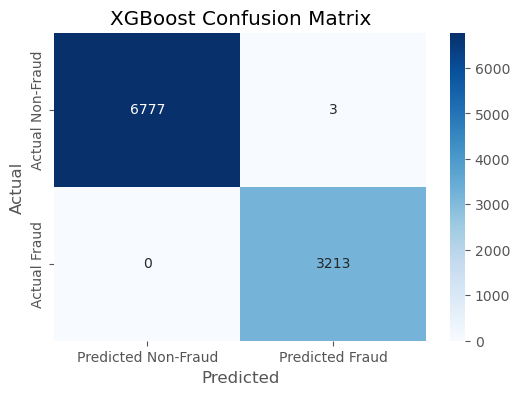

In [173]:
# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Convert confusion matrix to DataFrame for visualization
cm_df = pd.DataFrame(cm_xgb, index=["Actual Non-Fraud", "Actual Fraud"], columns=["Predicted Non-Fraud", "Predicted Fraud"])

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [174]:
# Compute key evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the results
print(f"🔹 XGBoost Best Parameters: {grid_search.best_params_}")
print(f"🔹 XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"🔹 XGBoost Precision: {precision_xgb:.4f}")
print(f"🔹 XGBoost Recall: {recall_xgb:.4f}")
print(f"🔹 XGBoost F1-Score: {f1_xgb:.4f}")
print("🔹 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

🔹 XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
🔹 XGBoost Accuracy: 0.9997
🔹 XGBoost Precision: 0.9991
🔹 XGBoost Recall: 1.0000
🔹 XGBoost F1-Score: 0.9995
🔹 XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6780
         1.0       1.00      1.00      1.00      3213

    accuracy                           1.00      9993
   macro avg       1.00      1.00      1.00      9993
weighted avg       1.00      1.00      1.00      9993



- 1️⃣ Near-Perfect Accuracy (99.97%) - The model correctly predicts fraud and non-fraud cases with extremely high accuracy.
- 2️⃣ High Precision (99.91%) - The model rarely misclassifies non-fraudulent transactions as fraud (low false positives)
- 3️⃣ Perfect Recall (100%) - The model identifies all actual fraud cases, meaning zero false negatives.
- 4️⃣ Balanced F1-Score (99.95%) - A high F1-score confirms that the model maintains a good balance between precision and recall.
- 5️⃣ Best Hyperparameters
- Learning Rate (0.01): Ensures the model learns gradually, reducing overfitting risks.
- Max Depth (3): Keeps the model simple, preventing unnecessary complexity.
- 200 Estimators: More trees improve stability without excessive computation.
- Subsample (0.8): Introduces randomness, helping generalization.

📌 Final Insight:
✅ XGBoost is highly optimized, achieving a strong balance between precision and recall.

### XGBoost with Hyperparameter Tuning & Cross-Validation

In [175]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform


# # Define base XGBoost model
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)


# # Define hyperparameter distribution for randomized search
# param_dist = {
#     'n_estimators': np.arange(100, 500, 100),  # Randomly choose from [100, 200, 300, 400]
#     'max_depth': np.arange(3, 10, 2),         # Test depths [3, 5, 7, 9]
#     'learning_rate': uniform(0.01, 0.2),      # Random values between 0.01 and 0.21
#     'subsample': uniform(0.5, 0.5),           # Random values between 0.5 and 1.0
#     'colsample_bytree': uniform(0.5, 0.5),    # Random values between 0.5 and 1.0
#     'reg_alpha': uniform(0, 1),               # L1 regularization (0 to 1)
#     'reg_lambda': uniform(0, 1)               # L2 regularization (0 to 1)
# }

In [176]:
# # RandomizedSearchCV with 10 iterations (faster than GridSearchCV)
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_dist,
#     n_iter=10,  # Reducing number of trials for speed
#     cv=3,  # Reducing folds from 5 to 3
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )

In [177]:
# random_search.fit(X_train, y_train)

In [178]:
# # Get the best model and parameters
# best_xgb_model = random_search.best_estimator_
# best_params = random_search.best_params_
# print(f"🔹 Best XGBoost Parameters: {best_params}")

# # Predict on test data
# y_pred = best_xgb_model.predict(X_test)

In [179]:
# Define the best model with optimized hyperparameters
best_xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.8038,
    learning_rate=0.0441,
    max_depth=7,
    n_estimators=200,
    reg_alpha=0.9489,
    reg_lambda=0.9656,
    subsample=0.9042,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

# Train the model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

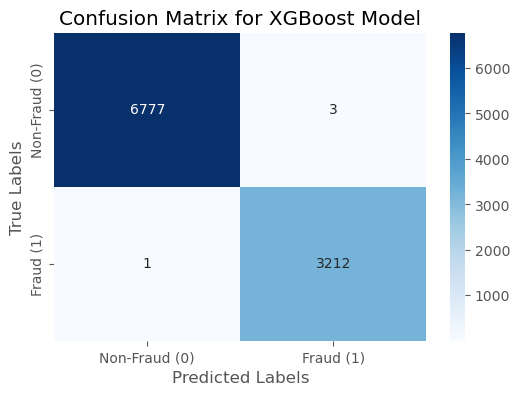

In [180]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


In [181]:
# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Print key metrics
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6780
         1.0       1.00      1.00      1.00      3213

    accuracy                           1.00      9993
   macro avg       1.00      1.00      1.00      9993
weighted avg       1.00      1.00      1.00      9993

🔹 Accuracy: 0.9996
🔹 Precision: 0.9991
🔹 Recall: 0.9997
🔹 F1-Score: 0.9994
